# Results notebook for AutoER paper

All tables and plots for the paper

In [84]:
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

FIGURES_DIR = "./figures/"
TABLES_DIR = "./sheets/"

# Datasets (D1-D10, DBPedia)

| Test | Dataset Specs            | #D1   | #D2   | #Duplicates |
|------|--------------------------|-------|-------|-------------|
| D1   | Restaurants1-Restaurants2| 340   | 2257  | 89          |
| D2   | Abt-Buy                  | 1077  | 1076  | 1076        |
| D3   | Amazon-Google Products   | 1355  | 3040  | 1103        |
| D4   | DBLP-ACM                 | 2617  | 2295  | 2225        |
| D5   | IMDB-TMDB                | 5119  | 6057  | 1969        |
| D6   | IMDB-TVDB                | 5119  | 7811  | 1073        |
| D7   | TMDB-TVDB                | 6057  | 7811  | 1096        |
| D8   | Walmart-Amazon           | 2555  | 22075 | 853         |
| D9   | DBLP-Google Scholar      | 2517  | 61354 | 2309        |
| D10  | IMDB-DBPedia             | 27616 | 23183 | 22864       |


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_specs = pd.read_csv('./data/dataset_specs.csv')
dataset_specs

,dataset,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity
0,D1,2595,13,4273,8649,3.330000,1.650000,665.310000,328.690000,4.326000e+03,107.710000,20.590000,5
1,D2,2152,3,4383,4876,2.270000,2.040000,1625.330000,1461.000000,1.580000e+03,197.280000,39.850000,3
2,D3,4393,4,9674,14412,3.280000,2.200000,3603.000000,2418.500000,3.160000e+03,585.150000,103.270000,4
3,D4,4910,4,6592,19626,4.000000,1.340000,4906.500000,1648.000000,1.400000e+01,129.750000,23.010000,4
4,D5,11174,37,13624,45055,4.030000,1.220000,1217.700000,368.220000,1.784250e+05,81.200000,17.000000,20
5,D6,12928,18,12471,42196,3.260000,0.960000,2344.220000,692.830000,6.122800e+04,73.930000,14.620000,8
6,D7,13866,31,13834,44663,3.220000,1.000000,1440.740000,446.260000,2.326570e+05,100.660000,20.400000,20
7,D8,24628,6,62834,128458,5.220000,2.550000,21409.670000,10472.330000,1.931000e+04,102.340000,23.850000,6
8,D9,63869,4,129067,208065,3.260000,2.020000,52016.250000,32266.750000,4.741100e+04,108.150000,19.380000,4
9,D10,50797,10,424346,971445,19.120000,8.350000,97144.500000,42434.600000,6.540000e+07,283.020000,62.720000,1306


In [86]:
dbpedia_features = pd.read_csv('./data/dbpedia_features.csv')
dbpedia_features.loc[dbpedia_features['Dataset'] == 'dbpedia', 'Dataset'] = 'DBPEDIA'
dbpedia_features.rename(columns={'Dataset': 'dataset'}, inplace=True)
dbpedia_features

,dataset,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity
0,DBPEDIA,3354773,57104,12070735,51918529,15.476018,3.598078,909.192508,211.381602,1.604093e+10,375.698749,79.390752,4797


In [87]:
all_features = pd.concat([dataset_specs, dbpedia_features], ignore_index=True)
all_features

,dataset,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity
0,D1,2595,13,4273,8649,3.330000,1.650000,665.310000,328.690000,4.326000e+03,107.710000,20.590000,5
1,D2,2152,3,4383,4876,2.270000,2.040000,1625.330000,1461.000000,1.580000e+03,197.280000,39.850000,3
2,D3,4393,4,9674,14412,3.280000,2.200000,3603.000000,2418.500000,3.160000e+03,585.150000,103.270000,4
3,D4,4910,4,6592,19626,4.000000,1.340000,4906.500000,1648.000000,1.400000e+01,129.750000,23.010000,4
4,D5,11174,37,13624,45055,4.030000,1.220000,1217.700000,368.220000,1.784250e+05,81.200000,17.000000,20
5,D6,12928,18,12471,42196,3.260000,0.960000,2344.220000,692.830000,6.122800e+04,73.930000,14.620000,8
6,D7,13866,31,13834,44663,3.220000,1.000000,1440.740000,446.260000,2.326570e+05,100.660000,20.400000,20
7,D8,24628,6,62834,128458,5.220000,2.550000,21409.670000,10472.330000,1.931000e+04,102.340000,23.850000,6
8,D9,63869,4,129067,208065,3.260000,2.020000,52016.250000,32266.750000,4.741100e+04,108.150000,19.380000,4
9,D10,50797,10,424346,971445,19.120000,8.350000,97144.500000,42434.600000,6.540000e+07,283.020000,62.720000,1306


Per attribute values based on features extracted from the datasets

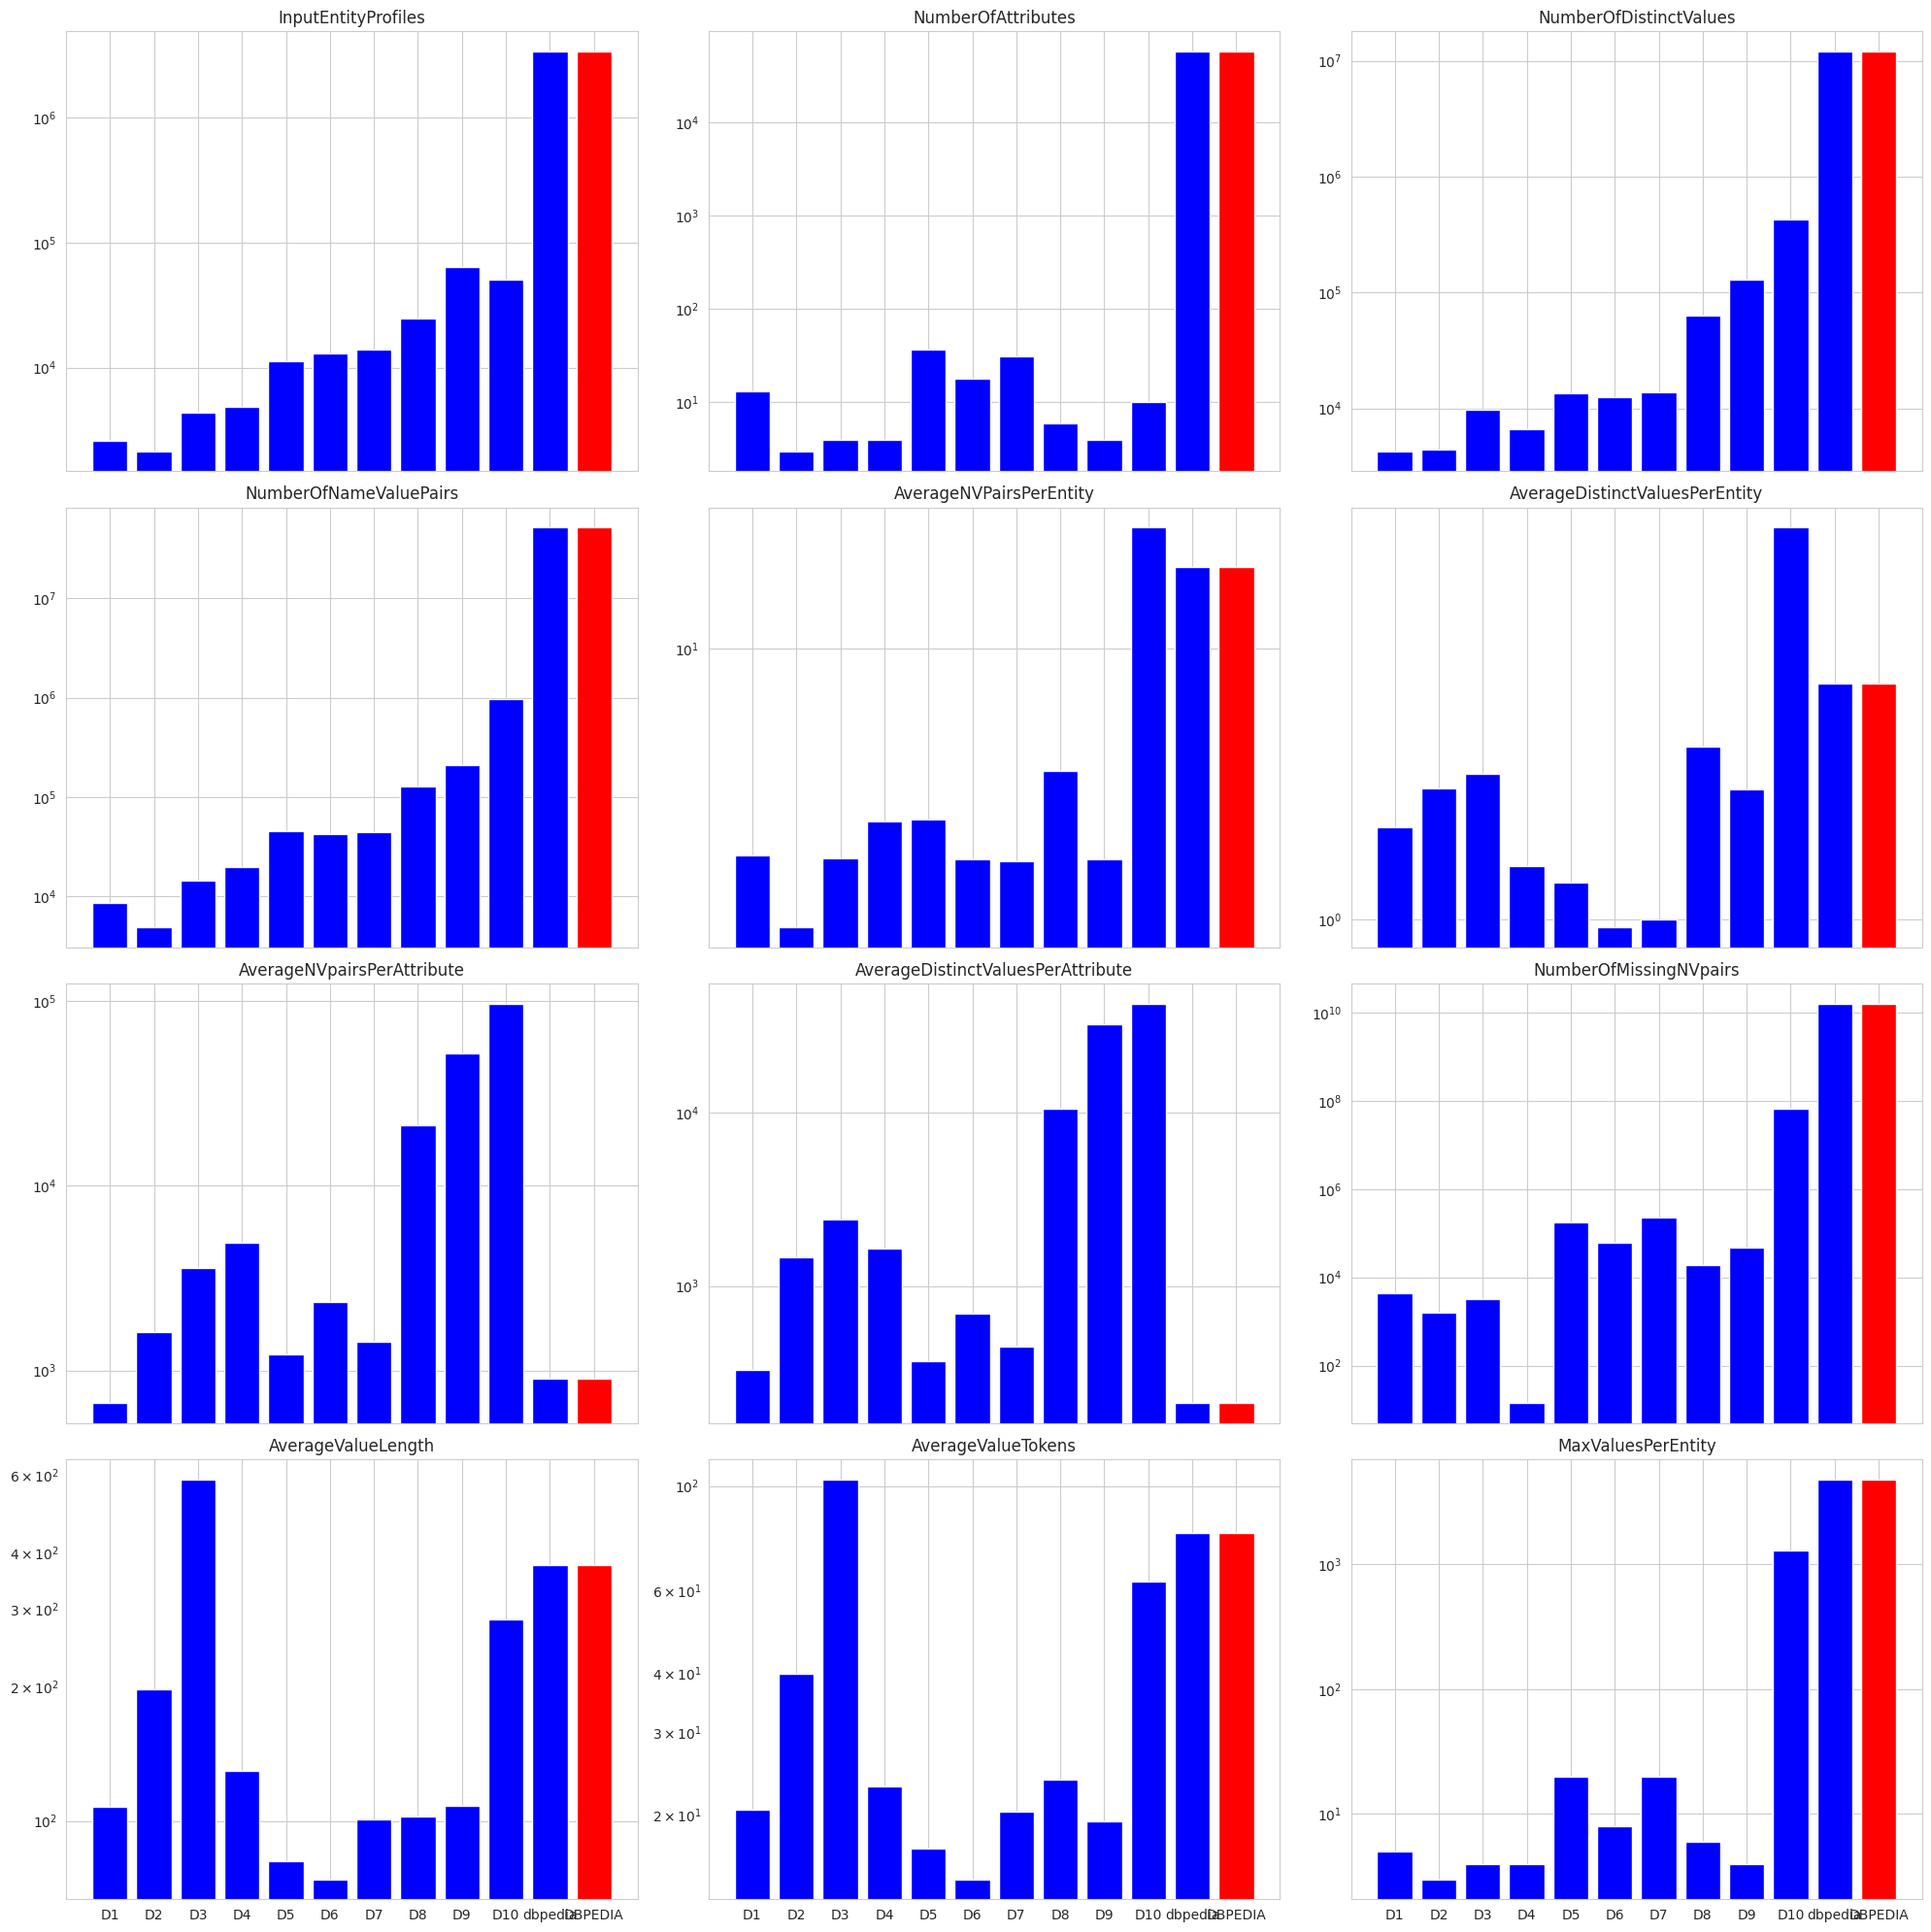

In [88]:
data=all_features

columns_to_plot = [
    'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues',
    'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity',
    'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute',
    'NumberOfMissingNVpairs', 'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity'
]
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True)

axes = axes.flatten()

for ax, column in zip(axes, columns_to_plot):
    colors = ['red' if dataset == 'DBPEDIA' else 'blue' for dataset in data['dataset']]
    ax.set_yscale('log')
    ax.bar(data['dataset'], data[column], color=colors)
    ax.set_title(f'{column}')
    ax.set_xticks(range(len(data['dataset'])))
    ax.set_xticklabels(data['dataset'])

for ax in axes[len(columns_to_plot):]:
    fig.delaxes(ax)

plt.tight_layout()
# plt.savefig(FIGURES_DIR + 'dataset_specs.png')
plt.show()

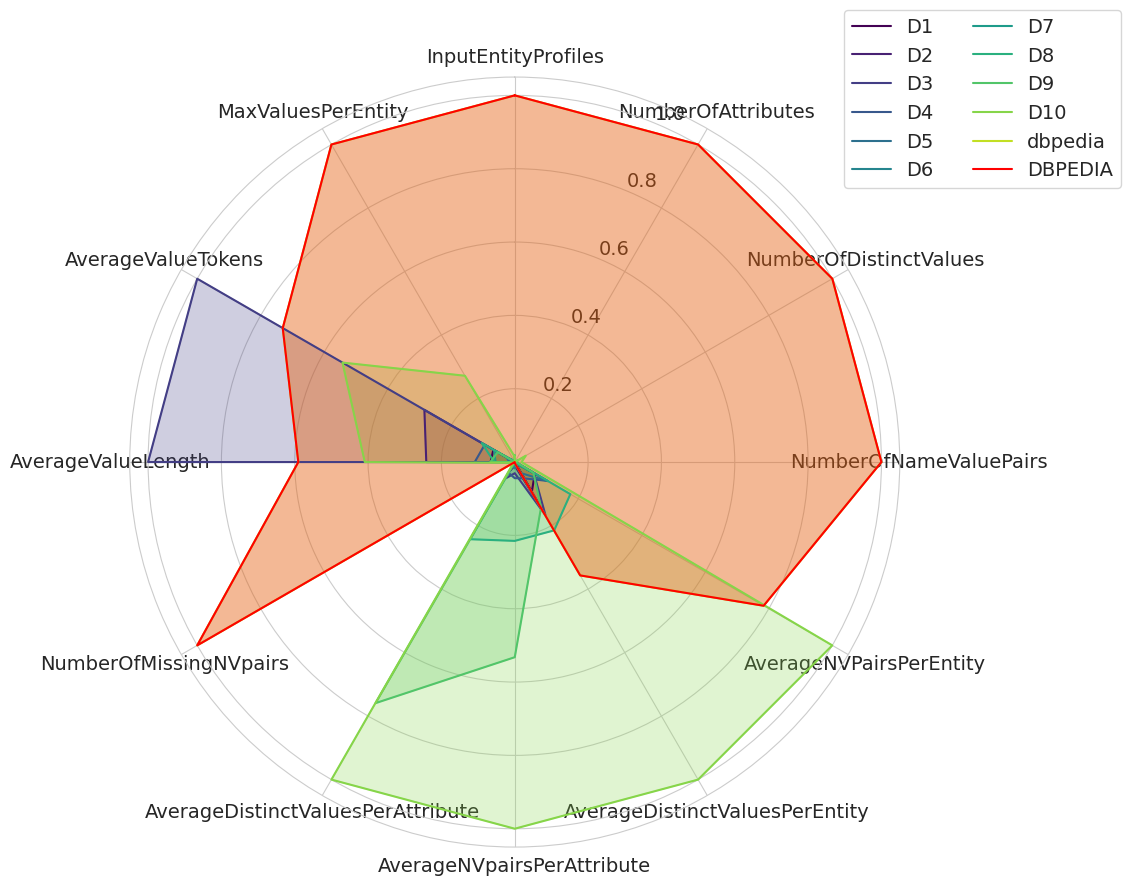

In [89]:
data=all_features

import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm

data_normalized = data.copy()
for column in columns_to_plot:
    data_normalized[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

def create_radar_chart(data, labels, title):
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels)
    
    ax.set_rscale('linear')

    color_map = plt.get_cmap('viridis')
    colors = color_map(np.linspace(0, 1, len(data)))

    for idx, row in data.iterrows():
        values = row[columns_to_plot].tolist()
        values += values[:1]
        color = 'red' if row['dataset'] == 'DBPEDIA' else colors[idx % len(colors)]
        ax.plot(angles, values, label=row['dataset'], color=color)
        # increase font size
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)

        

        ax.fill(angles, values, color=color, alpha=0.25)
    
    # plt.title(title)
    plt.legend(loc='upper right', ncols=2, bbox_to_anchor=(1.3, 1.1), fontsize=14)
    plt.savefig(FIGURES_DIR + 'dataset_specs_radar.png', bbox_inches='tight')
    plt.show()

create_radar_chart(data_normalized, columns_to_plot, 'Comparison of Datasets')


## DBPEDIA dataset

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

dbpedia_features = pd.read_csv('./data/dbpedia_features.csv')
dbpedia_features

,Dataset,InputEntityProfiles,NumberOfAttributes,NumberOfDistinctValues,NumberOfNameValuePairs,AverageNVPairsPerEntity,AverageDistinctValuesPerEntity,AverageNVpairsPerAttribute,AverageDistinctValuesPerAttribute,NumberOfMissingNVpairs,AverageValueLength,AverageValueTokens,MaxValuesPerEntity
0,dbpedia,3354773,57104,12070735,51918529,15.476018,3.598078,909.192508,211.381602,1.604093e+10,375.698749,79.390752,4797


# **Problem 1:** Available ground truth


## Optuna Visualizations

Contains 4 databases:
- autoconf_gridsearch.db
- autoconf_random.db
- autoconf_tpe.db
- autoconf_qmc.db

In [91]:
import optuna
db_name = 'autoconf_qmc.db'
storage_name = f'sqlite:////home/konstantinos/pyJedAI-AutoConfiguration/with_gt/dbs/{db_name}'  # Replace with your storage name
study_summaries = optuna.study.get_all_study_summaries(storage=storage_name)
study_names = [summary.study_name for summary in study_summaries]
print(study_names)

['D2_5_16', 'D2_10_16', 'D2_15_16', 'D2_20_16', 'D2_25_16', 'D2_30_16', 'D2_35_16', 'D2_40_16', 'D2_45_16', 'D2_50_16', 'D2_55_16', 'D2_60_16', 'D2_65_16', 'D2_70_16', 'D2_75_16', 'D2_80_16', 'D2_85_16', 'D2_90_16', 'D2_95_16', 'D2_100_16', 'D2_5_64', 'D2_10_64', 'D2_15_64', 'D2_20_64', 'D2_25_64', 'D2_30_64', 'D2_35_64', 'D2_40_64', 'D2_45_64', 'D2_50_64', 'D2_55_64', 'D2_60_64', 'D2_65_64', 'D2_70_64', 'D2_75_64', 'D2_80_64', 'D2_85_64', 'D2_90_64', 'D2_95_64', 'D2_100_64', 'D2_5_256', 'D2_10_256', 'D2_15_256', 'D2_20_256', 'D2_25_256', 'D2_30_256', 'D2_35_256', 'D2_40_256', 'D2_45_256', 'D2_50_256', 'D2_55_256', 'D2_60_256', 'D2_65_256', 'D2_70_256', 'D2_75_256', 'D2_80_256', 'D2_85_256', 'D2_90_256', 'D2_95_256', 'D2_100_256', 'D2_5_1024', 'D2_10_1024', 'D2_15_1024', 'D2_20_1024', 'D2_25_1024', 'D2_30_1024', 'D2_35_1024', 'D1_5_16', 'D1_10_16', 'D1_15_16', 'D2_40_1024', 'D1_20_16', 'D2_45_1024', 'D1_25_16', 'D1_30_16', 'D2_50_1024', 'D1_35_16', 'D2_55_1024', 'D1_40_16', 'D2_60_1024

In [92]:
# db_name = 'autoconf_gridsearch.db'
# storage_name = f'sqlite:////home/konstantinos/pyJedAI-AutoConfiguration/with_gt/dbs/{db_name}'  # Replace with your storage name
# study_summaries = optuna.study.get_all_study_summaries(storage=storage_name)
# study_names = [summary.study_name for summary in study_summaries]
# print(study_names)

In [93]:
study_name = study_names[0]
study = optuna.load_study(study_name=study_name, storage=storage_name)

df = study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_clustering,params_k,params_lm,params_threshold,state
0,0,39.2279,2024-08-02 22:35:52.578990,2024-08-02 22:35:53.194878,0 days 00:00:00.615888,KiralyMSMApproximateClustering,17,word2vec,0.120193,COMPLETE
1,1,64.2683,2024-08-02 22:35:53.213376,2024-08-02 22:35:53.455042,0 days 00:00:00.241666,ConnectedComponentsClustering,1,smpnet,0.050000,COMPLETE
2,2,41.0602,2024-08-02 22:35:53.468616,2024-08-02 22:35:54.324064,0 days 00:00:00.855448,UniqueMappingClustering,51,word2vec,0.500000,COMPLETE
3,3,0.0000,2024-08-02 22:35:54.338363,2024-08-02 22:35:55.149699,0 days 00:00:00.811336,ConnectedComponentsClustering,75,fasttext,0.275000,COMPLETE
4,4,37.9910,2024-08-02 22:35:55.174902,2024-08-02 22:35:55.565136,0 days 00:00:00.390234,KiralyMSMApproximateClustering,25,word2vec,0.725000,COMPLETE


In [94]:
import plotly.graph_objects as go
custom_layout = go.Layout(
    font=dict(family="Arial, sans-serif", size=12, color="#4d4d4d"),
    title=dict(font=dict(size=20, color='#333')),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridcolor='#ebebeb',
        gridwidth=1,
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='#ebebeb'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='#ebebeb',
        gridwidth=1,
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='#ebebeb'
    )
)

In [95]:
fig = optuna.visualization.plot_optimization_history(study)
fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"optimization_history.png", width=1200, height=800)
fig.show()

In [96]:
# fig = optuna.visualization.plot_parallel_coordinate(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_parallel_coordinate.png")
# fig.show()

In [97]:
# fig = optuna.visualization.plot_contour(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_contour.png")
# fig.show()

In [98]:
# fig = optuna.visualization.plot_param_importances(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_param_importances.png", width=1200, height=800)
# fig.show()

In [99]:
# fig = optuna.visualization.plot_edf(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_edf.png", width=1200, height=800)
# fig.show()

## All trials logs (All samplers + all seeds + gridsearch concatenated)

In [100]:
all_trials_raw = pd.read_csv('./data/trials.csv')
all_trials_raw

,trial,dataset,clustering,lm,k,threshold,sampler,seed,precision,recall,f1,runtime
0,0,D4,KiralyMSMApproximateClustering,word2vec,17,0.120193,qmc,16,98.4330,93.2104,95.7506,0.855900
1,1,D4,ConnectedComponentsClustering,smpnet,1,0.050000,qmc,16,99.4747,93.6601,96.4799,0.426300
2,2,D4,UniqueMappingClustering,word2vec,51,0.500000,qmc,16,94.2807,96.3579,95.3080,2.291400
3,3,D4,ConnectedComponentsClustering,fasttext,75,0.275000,qmc,16,0.0000,0.0000,0.0000,1.908300
4,4,D4,KiralyMSMApproximateClustering,word2vec,25,0.725000,qmc,16,98.5053,91.8615,95.0675,0.907000
...,...,...,...,...,...,...,...,...,...,...,...,...
608995,39895,D5,KiralyMSMApproximateClustering,word2vec,72,0.500000,gridsearch,42,51.1098,45.6301,48.2148,9.313238
608996,39896,D5,KiralyMSMApproximateClustering,word2vec,72,0.600000,gridsearch,42,53.1775,45.0711,48.7899,8.498901
608997,39897,D5,KiralyMSMApproximateClustering,word2vec,88,0.250000,gridsearch,42,48.5111,45.5285,46.9725,10.238626
608998,39898,D5,KiralyMSMApproximateClustering,word2vec,18,0.050000,gridsearch,42,48.8134,45.9858,47.3574,7.129898


In [101]:
all_trials= all_trials_raw

In [102]:
# all_trials = all_trials_raw[all_trials_raw['f1']!=0]
# all_trials['f1'] = all_trials['f1'].round(4)
# all_trials['threshold'] = all_trials['threshold'].round(4)
# all_trials.drop_duplicates(inplace=True)

# # all_trials.shape
# all_trials.to_csv('./data/trials_processed.csv')

In [103]:
all_trials.sample(5)

,trial,dataset,clustering,lm,k,threshold,sampler,seed,precision,recall,f1,runtime
269216,19316,D1,UniqueMappingClustering,sent_glove,62,0.70,gridsearch,42,28.2443,83.1461,42.1652,3.348255
574969,5869,D5,KiralyMSMApproximateClustering,fasttext,53,0.55,gridsearch,42,44.7395,45.3760,45.0555,3.925261
336411,6711,D2,ConnectedComponentsClustering,sdistilroberta,61,0.65,gridsearch,42,99.1379,10.6877,19.2953,1.712183
397394,27794,D10,UniqueMappingClustering,sent_glove,86,0.10,gridsearch,42,31.4994,22.1624,26.0186,30.883886
388941,19341,D10,UniqueMappingClustering,smpnet,89,0.60,gridsearch,42,73.6201,12.4262,21.2634,30.438756


Grid-search best F1s

In [104]:
gridsearch_trials = all_trials[all_trials['sampler'] == 'gridsearch']
gb_f1 = gridsearch_trials.groupby(['dataset']).agg({'f1': ['max']}).reset_index()
gb_f1.columns = ['dataset', 'f1_max']
# rename columns
gb_f1.rename(columns={'f1_max': 'GB-F1'}, inplace=True)

gb_f1

,dataset,GB-F1
0,D1,75.5319
1,D10,56.1170
2,D2,85.8486
3,D3,59.1887
4,D4,98.6011
5,D5,78.7255
6,D6,60.2534
7,D7,67.3557
8,D8,47.5550
9,D9,94.8861


In [138]:
gridsearch_trials

,trial,dataset,clustering,lm,k,threshold,sampler,seed,precision,recall,f1,runtime
210000,0,D4,KiralyMSMApproximateClustering,fasttext,97,0.85,gridsearch,42,93.4543,76.3939,84.0673,2.888602
210001,1,D4,UniqueMappingClustering,fasttext,43,0.60,gridsearch,42,82.6409,75.1349,78.7094,1.117376
210002,2,D4,KiralyMSMApproximateClustering,fasttext,31,0.30,gridsearch,42,92.7528,74.2356,82.4675,0.921575
210003,3,D4,ConnectedComponentsClustering,fasttext,83,0.90,gridsearch,42,100.0000,2.8327,5.5094,1.067627
210004,4,D4,KiralyMSMApproximateClustering,fasttext,45,0.95,gridsearch,42,98.3845,54.7662,70.3640,0.580548
...,...,...,...,...,...,...,...,...,...,...,...,...
608995,39895,D5,KiralyMSMApproximateClustering,word2vec,72,0.50,gridsearch,42,51.1098,45.6301,48.2148,9.313238
608996,39896,D5,KiralyMSMApproximateClustering,word2vec,72,0.60,gridsearch,42,53.1775,45.0711,48.7899,8.498901
608997,39897,D5,KiralyMSMApproximateClustering,word2vec,88,0.25,gridsearch,42,48.5111,45.5285,46.9725,10.238626
608998,39898,D5,KiralyMSMApproximateClustering,word2vec,18,0.05,gridsearch,42,48.8134,45.9858,47.3574,7.129898


Grid-search runtimes

In [139]:
# gridsearch_trials = all_trials[all_trials['sampler'] == 'gridsearch']
gb_runtime = gridsearch_trials.groupby(['dataset']).agg({'runtime': ['sum']}).reset_index()
gb_runtime.columns = ['dataset', 'runtime_sum']
gb_runtime

,dataset,runtime_sum
0,D1,1.492993e+05
1,D10,1.152362e+06
2,D2,1.392968e+05
3,D3,1.645690e+05
4,D4,1.643777e+05
5,D5,2.186331e+05
6,D6,2.556517e+05
7,D7,2.691919e+05
8,D8,5.253461e+05
9,D9,1.185349e+06


In [105]:
all_trials.describe()

,trial,k,threshold,seed,precision,recall,f1,runtime
count,609000.000000,609000.000000,609000.000000,609000.000000,609000.000000,609000.000000,609000.000000,609000.000000
mean,13081.971264,50.059200,0.499364,403.793103,49.606539,44.161768,39.010391,9.557645
std,13286.466185,30.521841,0.274040,1035.516027,32.822538,34.683452,30.125704,14.459217
min,0.000000,1.000000,0.050000,16.000000,0.000000,0.000000,0.000000,0.052400
25%,48.000000,23.000000,0.250000,42.000000,24.154250,7.835800,11.409000,2.486500
50%,9449.500000,50.000000,0.500000,42.000000,48.704900,45.376000,37.968600,4.665258
75%,24674.250000,77.000000,0.750000,64.000000,80.769200,73.880600,58.306200,9.129200
max,39899.000000,100.000000,0.950000,4096.000000,100.000000,98.876400,98.601100,281.495167


How many trials per approach?

RandomSampler [optuna]:  52500
QMCSampler [optuna]:  52500
TPESampler [optuna]:  52500
GPSampler [optuna]:  52500
Gridsearch [gridsearch]:  399000
All [all]:  609000
Dropped duplicates:  0


/tmp/ipykernel_1366611/659302128.py:35: MatplotlibDeprecationWarning:

hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "^". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.

/tmp/ipykernel_1366611/659302128.py:38: MatplotlibDeprecationWarning:

hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "^". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.



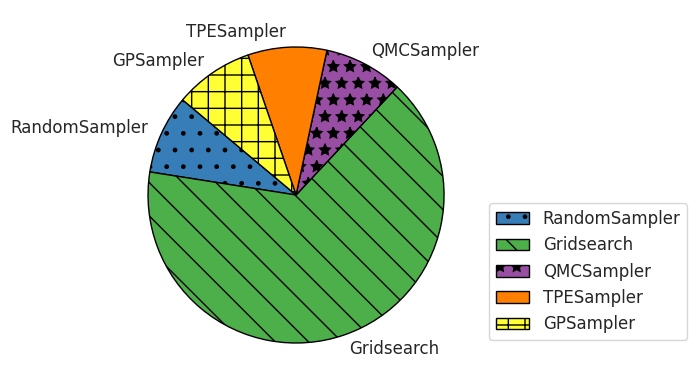

In [106]:
trial_counts = all_trials.groupby('sampler')['trial'].count()

print('RandomSampler [optuna]: ', trial_counts['random'])
print('QMCSampler [optuna]: ', trial_counts['qmc'])
print('TPESampler [optuna]: ', trial_counts['tpe'])
print('GPSampler [optuna]: ', trial_counts['gps'])
print('Gridsearch [gridsearch]: ', trial_counts['gridsearch'])
print('All [all]: ', all_trials.shape[0])
print('Dropped duplicates: ', all_trials_raw.shape[0] - all_trials.shape[0])

import matplotlib.patches as mpatches

# Assuming trial_counts is a pandas Series and has been calculated as shown in your initial code
# sampler_counts = trial_counts.values  # This should represent the count values for each sampler
sampler_labels = ['RandomSampler', 'Gridsearch', 'QMCSampler', 'TPESampler', 'GPSampler']
sampler_counts = trial_counts.values  # Assuming 'trial_counts' is a pandas Series

# Colors and patterns for colorblind-friendly visualization
colors = ['#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
hatches = ['.', '\\', '*', '^', '+']

# Creating a pie chart with patterns for colorblind accessibility
plt.figure(figsize=(6, 4))
wedges, texts = plt.pie(
    sampler_counts, 
    labels=sampler_labels, 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(linewidth=1, edgecolor='black'),
    textprops={'fontsize': 12}  # Increase font size for labels
)

# Adding hatches (patterns) to each wedge for colorblind-friendly design
for wedge, hatch in zip(wedges, hatches):
    wedge.set_hatch(hatch)

# Adding a legend with patterns and increasing font size
patches = [mpatches.Patch(edgecolor='black', facecolor=colors[i], hatch=hatches[i], label=sampler_labels[i]) for i in range(len(sampler_labels))]
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Increase font size for labels
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Save and show plot
plt.savefig(FIGURES_DIR + 'sampler_distribution.png', bbox_inches='tight')
plt.tight_layout()  # Adjust layout to make room for the legend and title
plt.show()

## Convergence diagrams

In [107]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapezoid

import seaborn as sns

sns.set_style("whitegrid")

suffix = './with_gt/results/'
dirs = ['qmc', 'tpe', 'random', 'gps']
methods = ['QMCSampler', 'TPESampler', 'RandomSampler', 'GPSampler']
palette = {
    'QMCSampler': 'blue',
    'TPESampler': 'green',
    'RandomSampler': 'red',
    'GPSampler': 'orange'
}
data = {f'D{i}': {method: None for method in methods} for i in range(1, 11)}

for method, directory in zip(methods, dirs):
    for i in range(1, 11):
        batches = [i for i in range(5, 100 + 5, 5)]
        print(f'{suffix}{directory}/D{i}.csv')
        df = pd.read_csv(f'{suffix}{directory}/D{i}.csv')
        df['initial_index'] = df.index
        max_trials = []
        seed = df['seed'].iloc[0]
        sampler = df['sampler'].iloc[0]
        for row in df.iterrows():
            row = row[1]
            prev_seed = seed
            prev_sampler = sampler
            seed = row['seed']
            sampler =  row['sampler']
            if seed != prev_seed or sampler != prev_sampler:
                batches = [i for i in range(5, 100 + 5, 5)]
            trials_id = row['trial']
            max_trials.append(batches[0])
            if trials_id == batches[0] - 1:
                batches.pop(0)
        df['max_trials'] = max_trials
        data[f'D{i}'][method] = df.sort_values(by=['initial_index'])

./with_gt/results/qmc/D1.csv


./with_gt/results/qmc/D2.csv
./with_gt/results/qmc/D3.csv
./with_gt/results/qmc/D4.csv
./with_gt/results/qmc/D5.csv
./with_gt/results/qmc/D6.csv
./with_gt/results/qmc/D7.csv
./with_gt/results/qmc/D8.csv
./with_gt/results/qmc/D9.csv
./with_gt/results/qmc/D10.csv
./with_gt/results/tpe/D1.csv
./with_gt/results/tpe/D2.csv
./with_gt/results/tpe/D3.csv
./with_gt/results/tpe/D4.csv
./with_gt/results/tpe/D5.csv
./with_gt/results/tpe/D6.csv
./with_gt/results/tpe/D7.csv
./with_gt/results/tpe/D8.csv
./with_gt/results/tpe/D9.csv
./with_gt/results/tpe/D10.csv
./with_gt/results/random/D1.csv
./with_gt/results/random/D2.csv
./with_gt/results/random/D3.csv
./with_gt/results/random/D4.csv
./with_gt/results/random/D5.csv
./with_gt/results/random/D6.csv
./with_gt/results/random/D7.csv
./with_gt/results/random/D8.csv
./with_gt/results/random/D9.csv
./with_gt/results/random/D10.csv
./with_gt/results/gps/D1.csv
./with_gt/results/gps/D2.csv
./with_gt/results/gps/D3.csv
./with_gt/results/gps/D4.csv
./with_gt/

#### Heatmaps

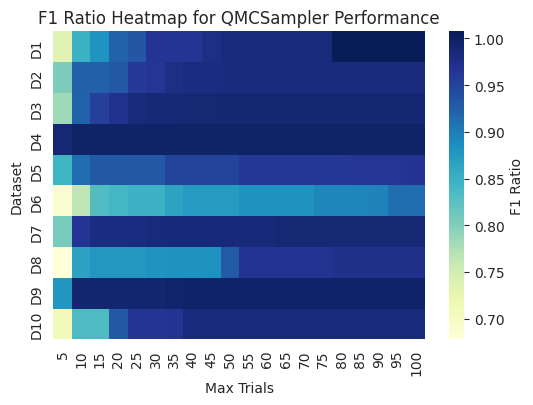

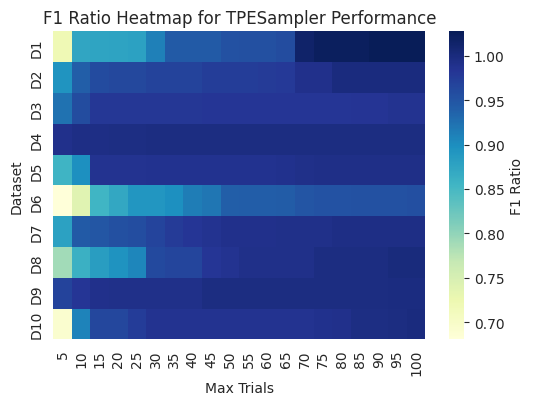

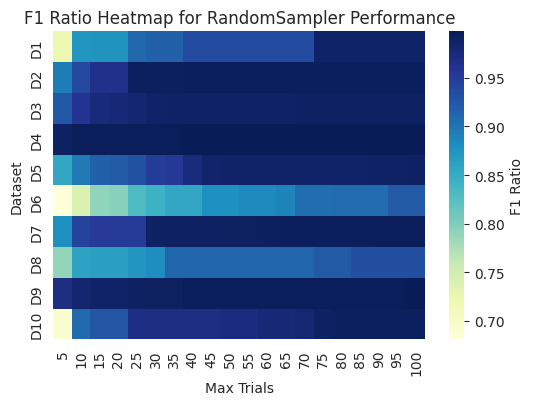

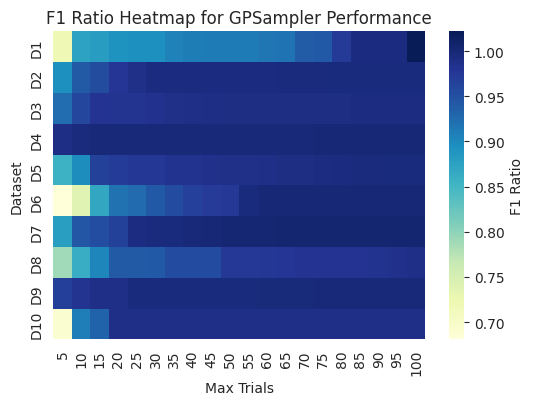

In [108]:
for i, sampler in enumerate(methods):
    heatmap_data = []

    for dataset, values in data.items():
        max_f1_per_seed_trial = values[sampler].groupby(['max_trials', 'seed'])['f1'].max().reset_index()
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()
        
        gb_f1_value = gb_f1[gb_f1['dataset'] == dataset]['GB-F1'].values[0]
        avg_max_f1_per_trial['f1_ratio'] = avg_max_f1_per_trial['f1'] / gb_f1_value
        for _, row in avg_max_f1_per_trial.iterrows():
            heatmap_data.append([dataset, row['max_trials'], row['f1_ratio']])
    heatmap_df = pd.DataFrame(heatmap_data, columns=['Dataset', 'Max Trials', 'F1 Ratio'])

    heatmap_df['Dataset'] = pd.Categorical(heatmap_df['Dataset'], categories=[f'D{i}' for i in range(1, 11)], ordered=True)

    heatmap_df['Max Trials'] = heatmap_df['Max Trials'].astype(int)

    heatmap_pivot = heatmap_df.pivot(index='Dataset', columns='Max Trials', values='F1 Ratio')

    plt.figure(figsize=(6, 4))
    sns.heatmap(heatmap_pivot, annot=False, cmap="YlGnBu", cbar_kws={'label': 'F1 Ratio'})
    plt.title(f'F1 Ratio Heatmap for {sampler} Performance')
    plt.xlabel('Max Trials')
    plt.ylabel('Dataset')
    plt.show()

        Sampler Dataset  Max Trials  Avg. Runtime
0    QMCSampler      D1           5       3.85480
1    QMCSampler      D1          10      10.03412
2    QMCSampler      D1          15      18.01564
3    QMCSampler      D1          20      21.91768
4    QMCSampler      D1          25      25.57774
..          ...     ...         ...           ...
195  QMCSampler     D10          80    1431.39492
196  QMCSampler     D10          85    1505.78966
197  QMCSampler     D10          90    1597.24468
198  QMCSampler     D10          95    1696.23456
199  QMCSampler     D10         100    1770.29952

[200 rows x 4 columns]


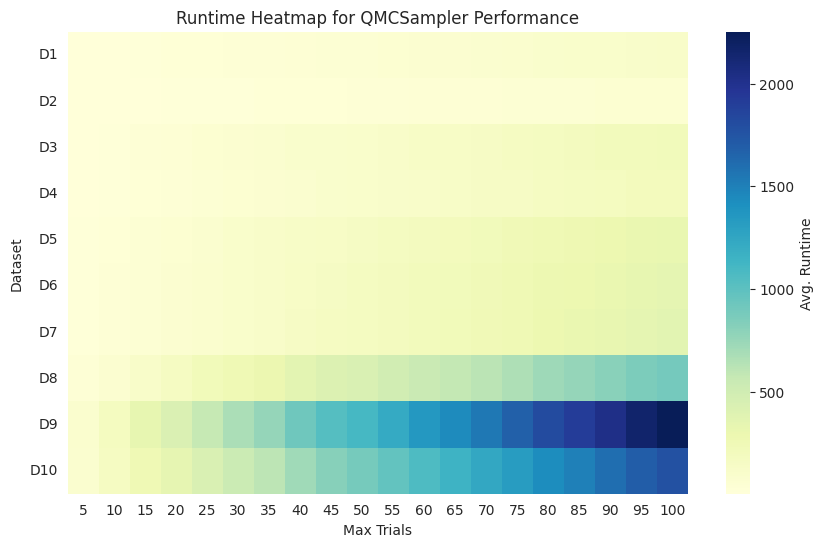

        Sampler Dataset  Max Trials  Avg. Runtime
0    TPESampler      D1           5       3.53350
1    TPESampler      D1          10       8.39400
2    TPESampler      D1          15      12.46112
3    TPESampler      D1          20      15.99420
4    TPESampler      D1          25      19.53752
..          ...     ...         ...           ...
195  TPESampler     D10          80    1942.34752
196  TPESampler     D10          85    2046.61002
197  TPESampler     D10          90    2128.96232
198  TPESampler     D10          95    2220.58106
199  TPESampler     D10         100    2291.61612

[200 rows x 4 columns]


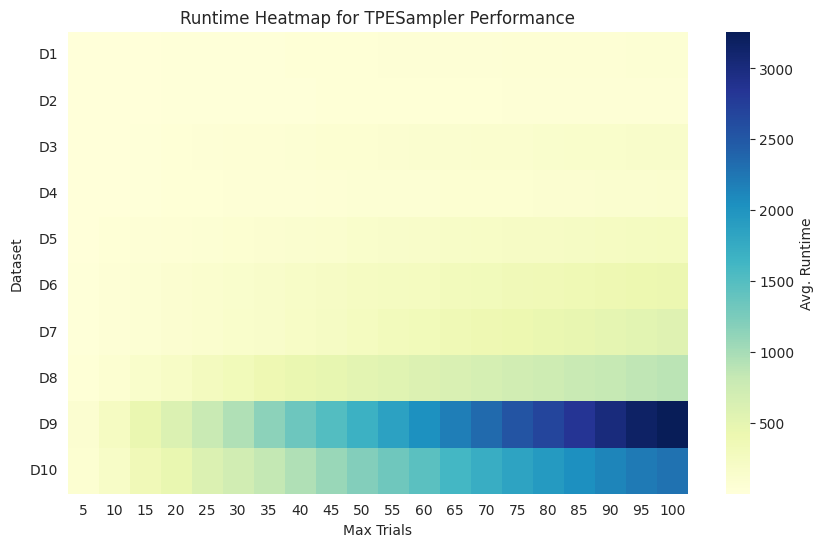

           Sampler Dataset  Max Trials  Avg. Runtime
0    RandomSampler      D1           5       3.81494
1    RandomSampler      D1          10       8.97534
2    RandomSampler      D1          15      13.72098
3    RandomSampler      D1          20      18.05328
4    RandomSampler      D1          25      22.98670
..             ...     ...         ...           ...
195  RandomSampler     D10          80    1497.20192
196  RandomSampler     D10          85    1599.07590
197  RandomSampler     D10          90    1681.40134
198  RandomSampler     D10          95    1771.98702
199  RandomSampler     D10         100    1859.23744

[200 rows x 4 columns]


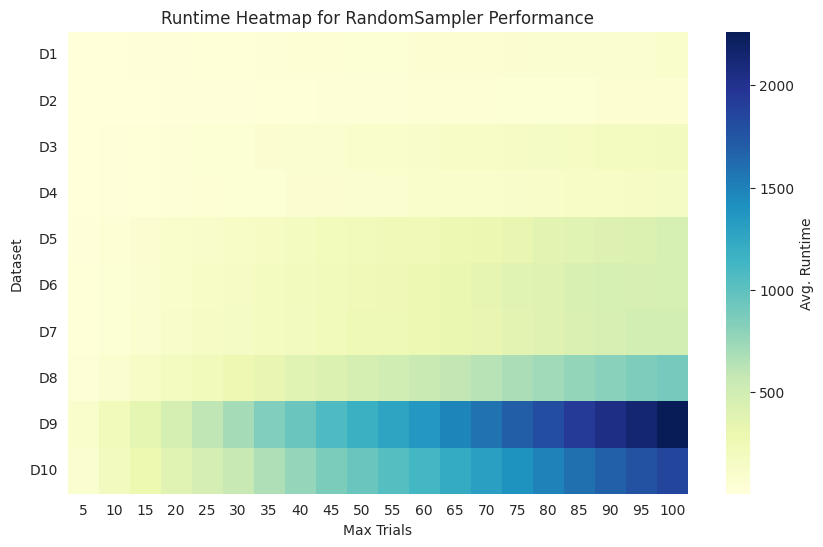

       Sampler Dataset  Max Trials  Avg. Runtime
0    GPSampler      D1           5       4.98810
1    GPSampler      D1          10      12.66424
2    GPSampler      D1          15      25.55412
3    GPSampler      D1          20      41.17648
4    GPSampler      D1          25      64.32254
..         ...     ...         ...           ...
195  GPSampler     D10          80    1525.01034
196  GPSampler     D10          85    1601.40400
197  GPSampler     D10          90    1690.32018
198  GPSampler     D10          95    1764.26454
199  GPSampler     D10         100    1866.21602

[200 rows x 4 columns]


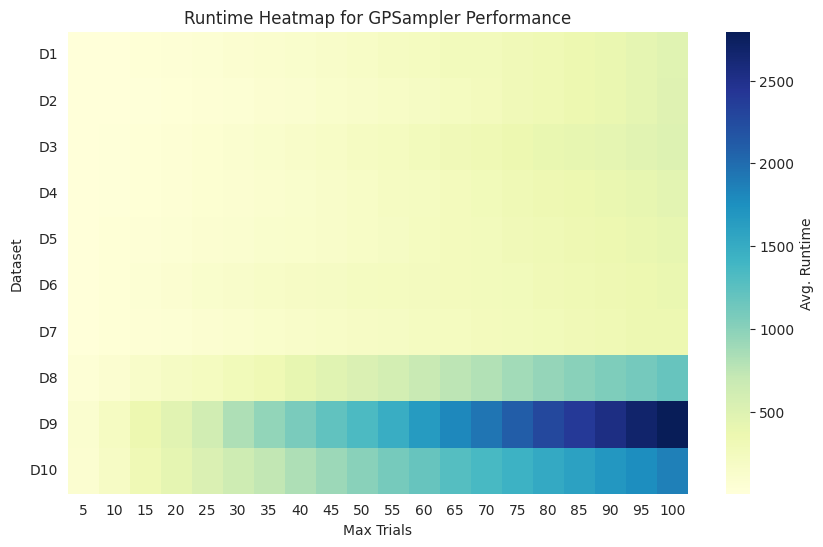

In [109]:
for i, sampler in enumerate(methods):
    heatmap_data = []

    for dataset, values in data.items():
        sum_runtime_per_trial = values[sampler].groupby(['max_trials', 'seed'])['runtime'].sum().reset_index()
        avg_runtime_per_max_trials = sum_runtime_per_trial.groupby('max_trials')['runtime'].mean().reset_index()
        avg_runtime_per_max_trials.columns = ['max_trials', 'avg_runtime']
        for _, row in avg_runtime_per_max_trials.iterrows():
            heatmap_data.append([sampler, dataset, row['max_trials'], row['avg_runtime']])
    heatmap_df = pd.DataFrame(heatmap_data, columns=['Sampler', 'Dataset', 'Max Trials', 'Avg. Runtime'])

    heatmap_df['Dataset'] = pd.Categorical(heatmap_df['Dataset'], categories=[f'D{i}' for i in range(1, 11)], ordered=True)

    heatmap_df['Max Trials'] = heatmap_df['Max Trials'].astype(int)

    print(heatmap_df)

    heatmap_pivot = heatmap_df.pivot(index='Dataset', columns='Max Trials', values='Avg. Runtime')

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_pivot, annot=False, cmap="YlGnBu", cbar_kws={'label': 'Avg. Runtime'})
    plt.title(f'Runtime Heatmap for {sampler} Performance')
    plt.xlabel('Max Trials')
    plt.ylabel('Dataset')
    plt.yticks(rotation=0)
    plt.show()

/home/conda/miniconda3/envs/autoconf/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



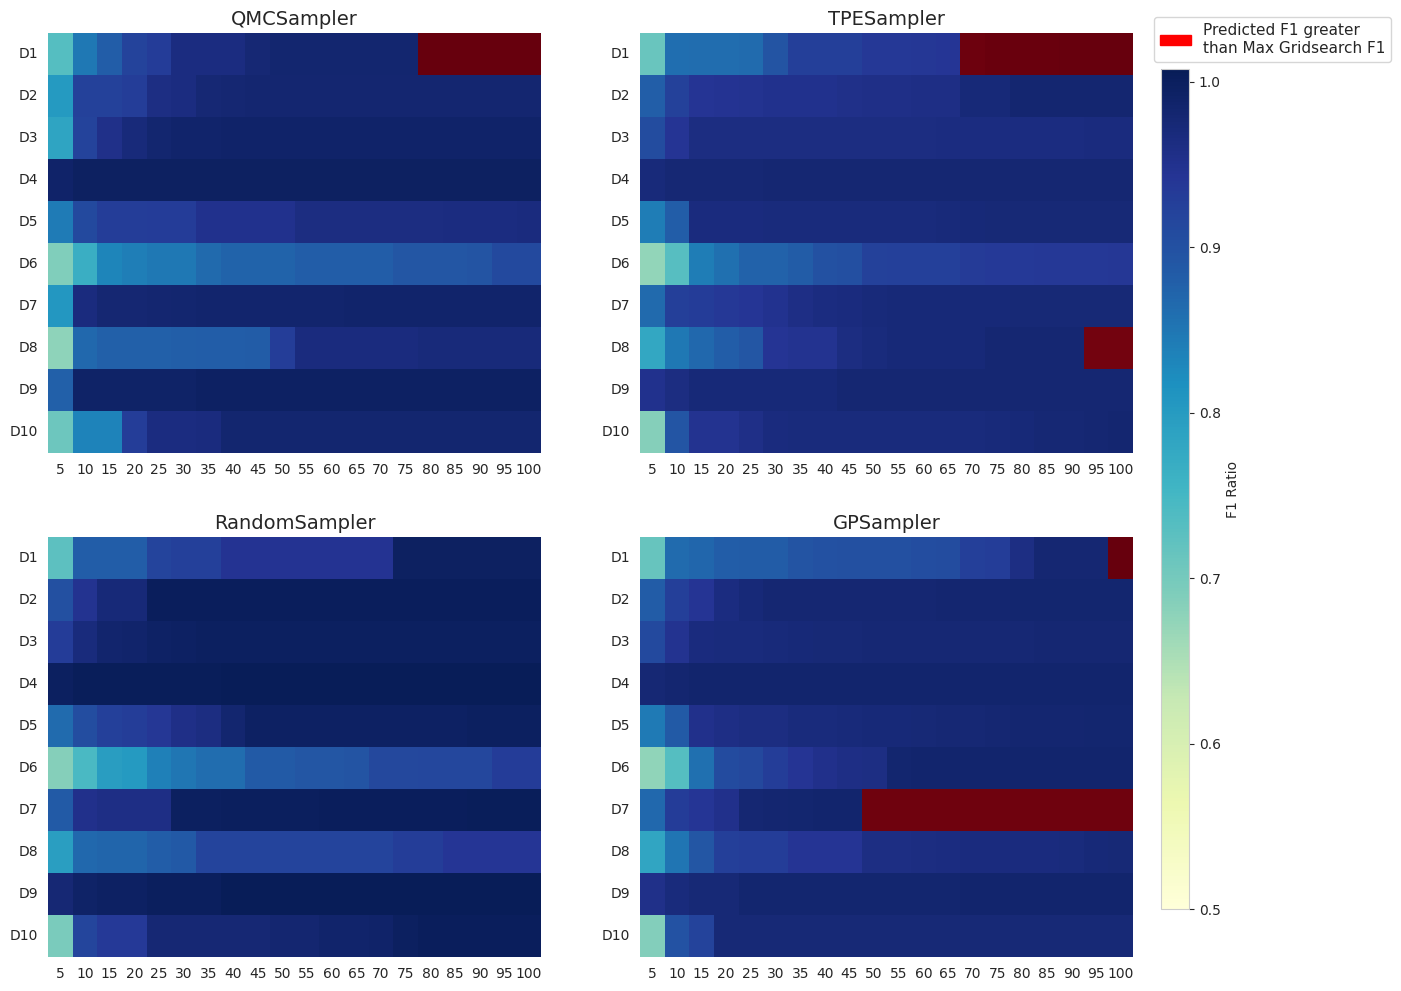

In [110]:
import matplotlib.colors as mcolors

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes = axes.flatten()

heatmap_plots = []
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap = mcolors.ListedColormap(cmap(np.linspace(0, 1, 256)))

for i, sampler in enumerate(methods):
    heatmap_data = []

    for dataset, values in data.items():

        max_f1_per_seed_trial = values[sampler].groupby(['max_trials', 'seed'])['f1'].max().reset_index()
        # print(max_f1_per_seed_trial)
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()

        gb_f1_value = gb_f1[gb_f1['dataset'] == dataset]['GB-F1'].values[0]

        avg_max_f1_per_trial['f1_ratio'] = avg_max_f1_per_trial['f1'] / gb_f1_value

        avg_max_f1_per_trial.to_csv(f'./with_gt/results/convergence/avg_max_f1_per_trial/{sampler}_{dataset}.csv', index=False)

        for _, row in avg_max_f1_per_trial.iterrows():
            heatmap_data.append([dataset, row['max_trials'], row['f1_ratio']])

    heatmap_df = pd.DataFrame(heatmap_data, columns=['Dataset', 'Max Trials', 'F1 Ratio'])

    heatmap_df['Dataset'] = pd.Categorical(heatmap_df['Dataset'], categories=[f'D{i}' for i in range(10, 0, -1)], ordered=True)
    heatmap_df['Max Trials'] = heatmap_df['Max Trials'].astype(int)
    
    heatmap_df.to_csv(f'./with_gt/results/convergence/{sampler}_convergence.csv')

    heatmap_pivot = heatmap_df.pivot(index='Dataset', columns='Max Trials', values='F1 Ratio')

    heatmap_pivot.sort_index(axis=0, ascending=False, inplace=True)
    mask = heatmap_pivot > 1.0

    ax = sns.heatmap(heatmap_pivot, annot=False, cmap=cmap, cbar=False, ax=axes[i], mask=mask, vmin=0.5, vmax=heatmap_pivot.max().max())
    sns.heatmap(heatmap_pivot, annot=False, cmap="Reds", cbar=False, ax=axes[i], mask=~mask, vmin=0.0)
    ax.set_facecolor('red')

    axes[i].set_title(f'{sampler}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    heatmap_plots.append(ax)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
plt.colorbar(heatmap_plots[0].collections[0], cax=cbar_ax, label='F1 Ratio')

red_patch = mpatches.Patch(color='red', label='Predicted F1 greater\nthan Max Gridsearch F1')

plt.legend(handles=[red_patch], loc='lower right', bbox_to_anchor=(8.5, 1.0), fontsize=11)
plt.savefig(FIGURES_DIR + 'sampler_heatmaps.png', bbox_inches='tight')
plt.show()


In [111]:
gb_f1

,dataset,GB-F1
0,D1,75.5319
1,D10,56.1170
2,D2,85.8486
3,D3,59.1887
4,D4,98.6011
5,D5,78.7255
6,D6,60.2534
7,D7,67.3557
8,D8,47.5550
9,D9,94.8861


/home/conda/miniconda3/envs/autoconf/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



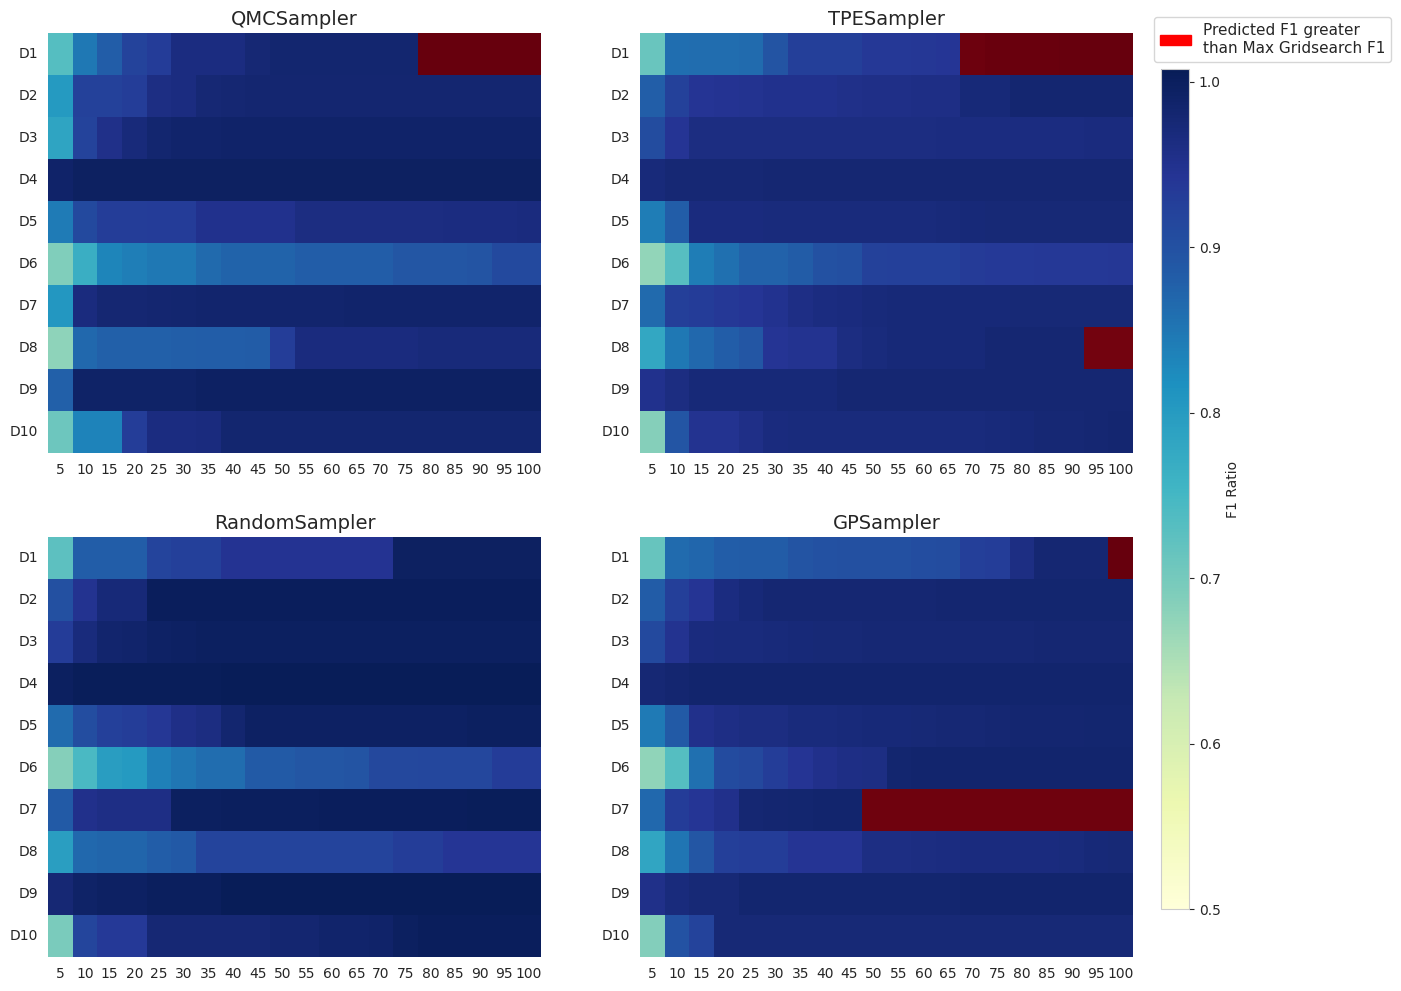

In [112]:
import matplotlib.colors as mcolors

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes = axes.flatten()

heatmap_plots = []
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap = mcolors.ListedColormap(cmap(np.linspace(0, 1, 256)))

for i, sampler in enumerate(methods):
    heatmap_data = []

    for dataset, values in data.items():

        max_f1_per_seed_trial = values[sampler].groupby(['max_trials', 'seed'])['f1'].max().reset_index()
        # print(max_f1_per_seed_trial)
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()

        gb_f1_value = gb_f1[gb_f1['dataset'] == dataset]['GB-F1'].values[0]

        avg_max_f1_per_trial['f1_ratio'] = avg_max_f1_per_trial['f1'] / gb_f1_value

        avg_max_f1_per_trial.to_csv(f'./with_gt/results/convergence/avg_max_f1_per_trial/{sampler}_{dataset}.csv', index=False)

        for _, row in avg_max_f1_per_trial.iterrows():
            heatmap_data.append([dataset, row['max_trials'], row['f1_ratio']])

    heatmap_df = pd.DataFrame(heatmap_data, columns=['Dataset', 'Max Trials', 'F1 Ratio'])

    heatmap_df['Dataset'] = pd.Categorical(heatmap_df['Dataset'], categories=[f'D{i}' for i in range(10, 0, -1)], ordered=True)
    heatmap_df['Max Trials'] = heatmap_df['Max Trials'].astype(int)
    
    heatmap_df.to_csv(f'./with_gt/results/convergence/{sampler}_convergence.csv')

    heatmap_pivot = heatmap_df.pivot(index='Dataset', columns='Max Trials', values='F1 Ratio')

    heatmap_pivot.sort_index(axis=0, ascending=False, inplace=True)
    mask = heatmap_pivot > 1.0

    ax = sns.heatmap(heatmap_pivot, annot=False, cmap=cmap, cbar=False, ax=axes[i], mask=mask, vmin=0.5, vmax=heatmap_pivot.max().max())
    sns.heatmap(heatmap_pivot, annot=False, cmap="Reds", cbar=False, ax=axes[i], mask=~mask, vmin=0.0)
    ax.set_facecolor('red')

    axes[i].set_title(f'{sampler}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    heatmap_plots.append(ax)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
plt.colorbar(heatmap_plots[0].collections[0], cax=cbar_ax, label='F1 Ratio')

red_patch = mpatches.Patch(color='red', label='Predicted F1 greater\nthan Max Gridsearch F1')

plt.legend(handles=[red_patch], loc='lower right', bbox_to_anchor=(8.5, 1.0), fontsize=11)
plt.savefig(FIGURES_DIR + 'sampler_heatmaps.png', bbox_inches='tight')
plt.show()


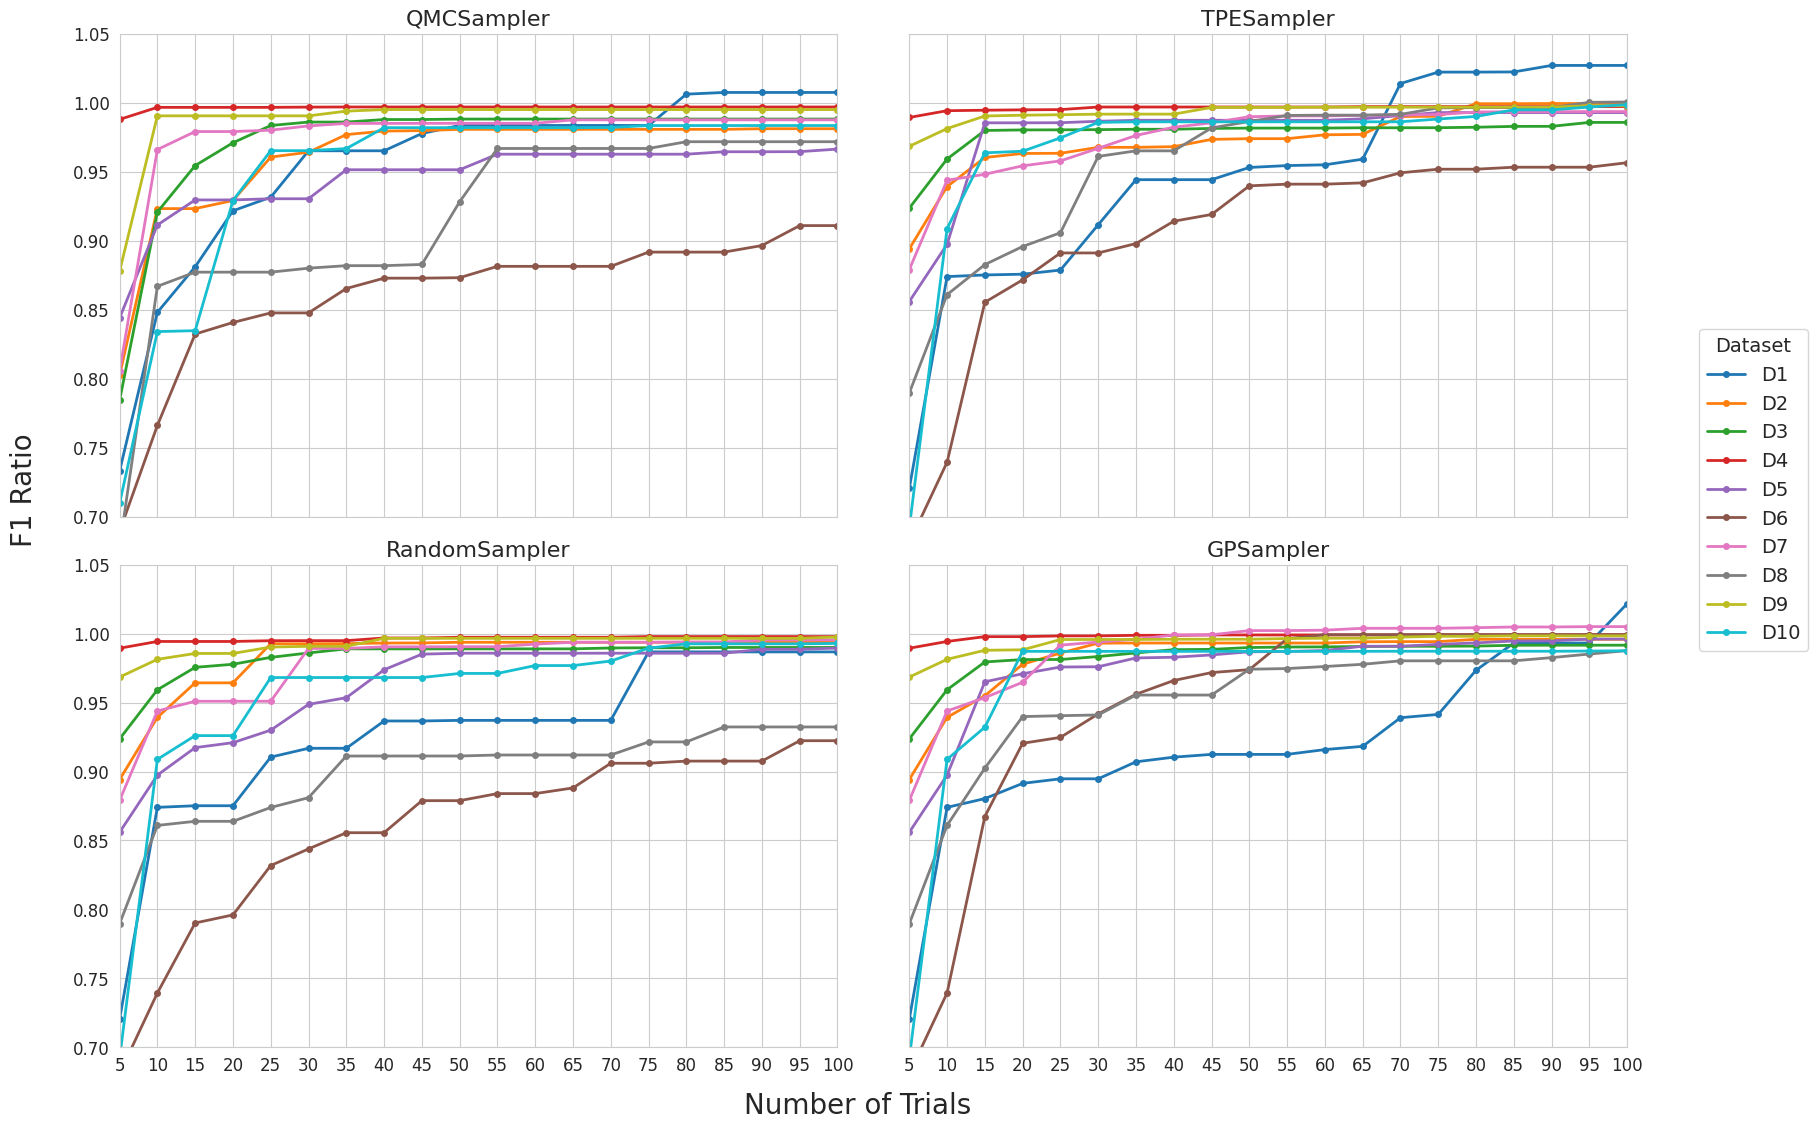

In [167]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True, sharex=True)
axes = axes.flatten()

for i, sampler in enumerate(methods):
    ax = axes[i]
    for dataset, values in data.items():
        max_f1_per_seed_trial = values[sampler].groupby(['max_trials', 'seed'])['f1'].max().reset_index()
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()

        gb_f1_value = gb_f1[gb_f1['dataset'] == dataset]['GB-F1'].values[0]

        avg_max_f1_per_trial['f1_ratio'] = avg_max_f1_per_trial['f1'] / gb_f1_value

        ax.plot(avg_max_f1_per_trial['max_trials'], avg_max_f1_per_trial['f1_ratio'], label=f'{dataset}', lw=2, marker='o', markersize=4)
        ax.set_xticks(range(5, 105, 5))

    ax.set_title(f'{sampler}', fontsize=16)
    ax.set_xlim(5, 100)
    ax.set_ylim(0.7, avg_max_f1_per_trial['f1_ratio'].max() + 0.05)
    ax.set_yticks(np.arange(0.7, avg_max_f1_per_trial['f1_ratio'].max() + 0.1, 0.05))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Dataset', loc='right', bbox_to_anchor=(1.1, 0.5), ncol=1, fontsize=14, title_fontsize=14)
fig.text(0.5, -0.02, 'Number of Trials', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'F1 Ratio', va='center', rotation='vertical', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.88, wspace=0.1, hspace=0.1)  # Increase wspace and hspace as needed
plt.savefig(FIGURES_DIR + 'f1_ratio_vs_trials_subplots.png', bbox_inches='tight')
plt.show()

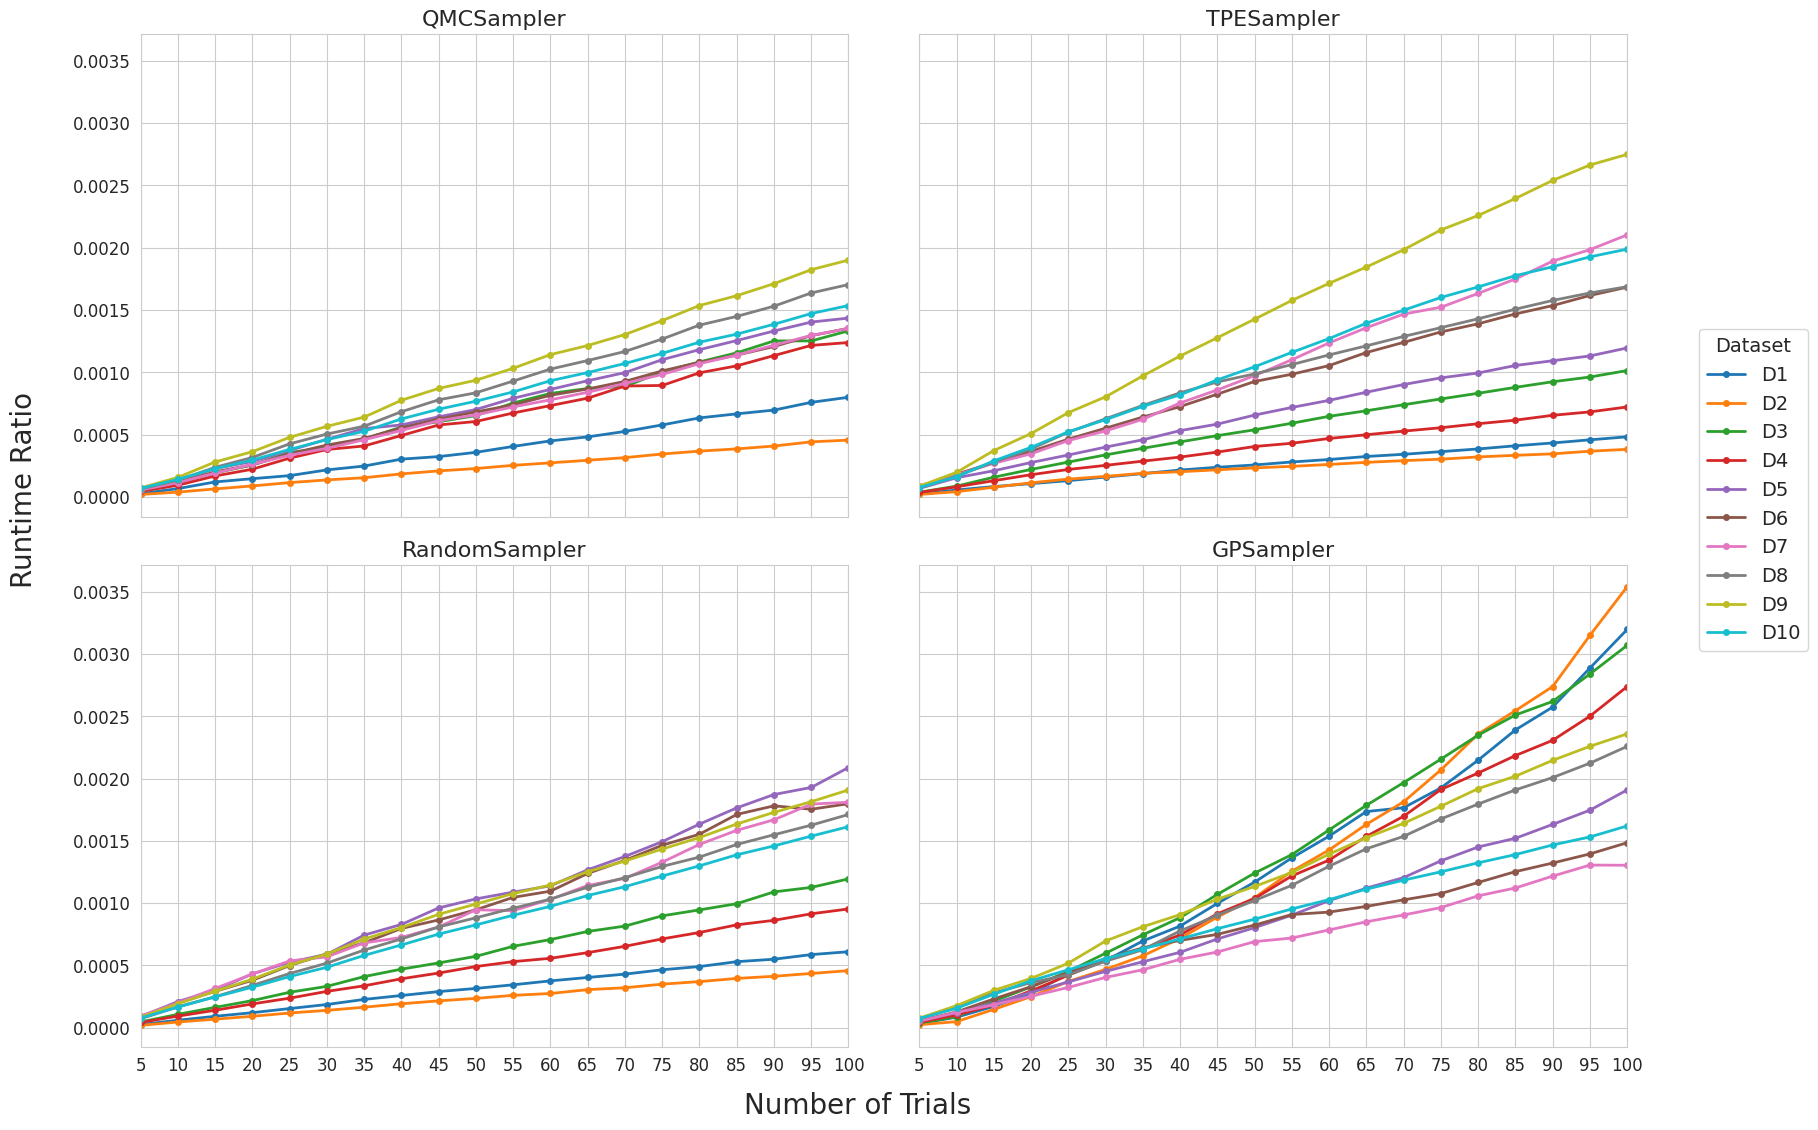

In [166]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True, sharex=True)
axes = axes.flatten()

for i, sampler in enumerate(methods):
    ax = axes[i]
    for dataset, values in data.items():
        sum_runtime_per_trial = values[sampler].groupby(['max_trials', 'seed'])['runtime'].sum().reset_index()
        avg_runtime_per_max_trials = sum_runtime_per_trial.groupby('max_trials')['runtime'].mean().reset_index()
        avg_runtime_per_max_trials.columns = ['max_trials', 'avg_runtime']

        gb_runtime_value = gb_runtime[gb_runtime['dataset'] == dataset]['runtime_sum'].values[0]

        avg_runtime_per_max_trials['runtime_ratio'] = avg_runtime_per_max_trials['avg_runtime'] / gb_runtime_value

        ax.plot(avg_runtime_per_max_trials['max_trials'], avg_runtime_per_max_trials['runtime_ratio'], 
                label=f'{dataset}', lw=2, marker='o', markersize=4)
        ax.set_xticks(range(5, 105, 5))

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_title(f'{sampler}', fontsize=16)
    # ax.set_xlabel('Number of Trials', fontsize=12)
    # ax.set_ylabel('Runtime Ratio', fontsize=12)
    ax.set_xlim(5, 100)
    ax.grid(True)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Dataset', loc='right', bbox_to_anchor=(1.1, 0.5), ncol=1, fontsize=14, title_fontsize=14)
fig.text(0.5, -0.02, 'Number of Trials', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'Runtime Ratio', va='center', rotation='vertical', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.88, wspace=0.1, hspace=0.1)
plt.savefig(FIGURES_DIR + 'runtimes_ratio_vs_trials_subplots.png', bbox_inches='tight')
plt.show()

#### F1

/tmp/ipykernel_1366611/510292636.py:25: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



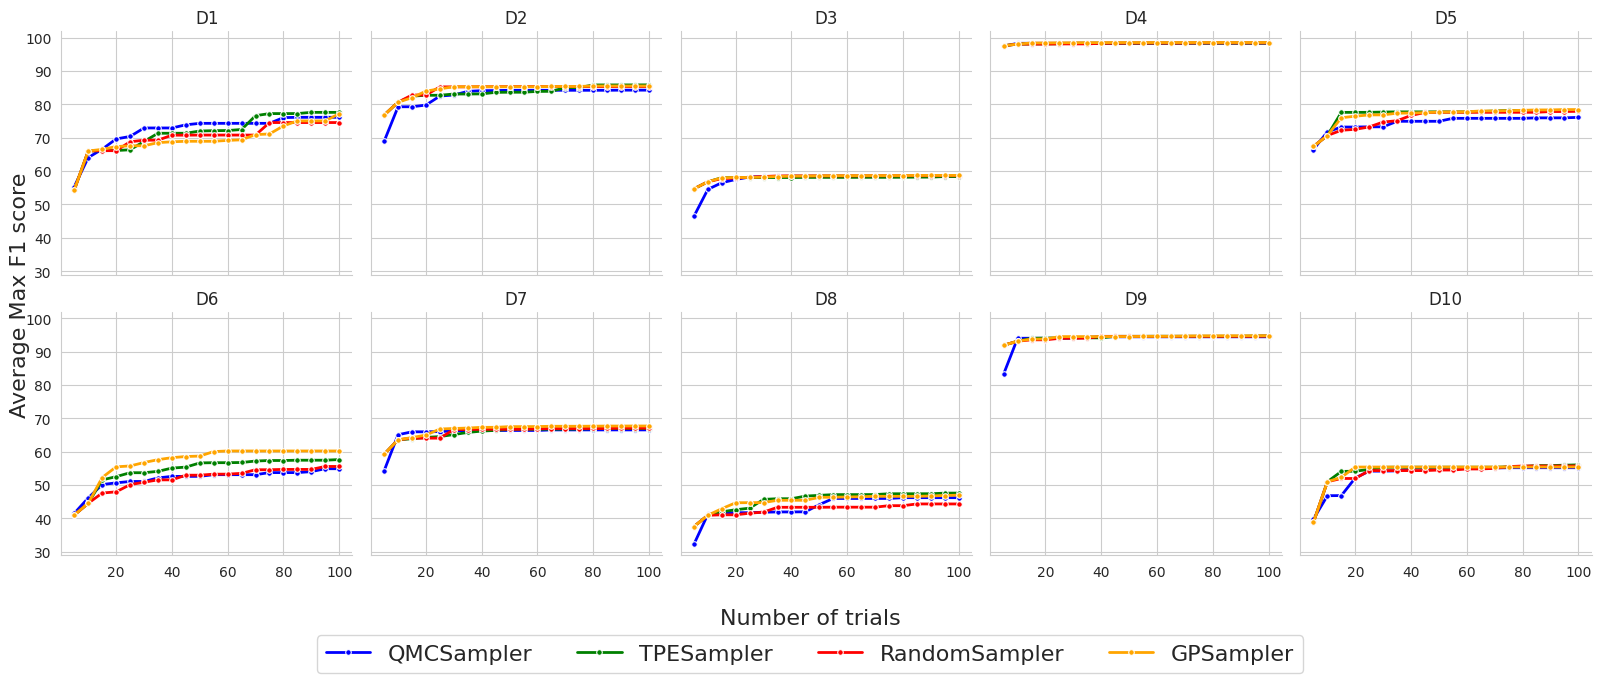

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)
axes = axes.flatten()

def plot_convergence(ax, dataset_name, dataset_data, auc_df, methods):
    for idx, method in enumerate(methods):
        df = dataset_data[method]
        max_f1_per_seed_trial = df.groupby(['max_trials', 'seed'])['f1'].max().reset_index()      
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()
        x = avg_max_f1_per_trial['max_trials'].values
        y = avg_max_f1_per_trial['f1'].values

        area_trapz = trapezoid(y, x)  
        max_x = max(x) if x.size > 0 else 0
        max_y = 100 
        square_area = max_x * max_y
        normalized_auc = area_trapz / square_area if square_area > 0 else 0

        new_row = pd.DataFrame({
            'dataset': [dataset_name],
            'sampler': [method],
            'auc': [normalized_auc],
            'runtime': [df['runtime'].sum()] 
        })

        auc_df = pd.concat([auc_df, new_row], ignore_index=True)
        sns.lineplot(ax=ax, x='max_trials', y='f1', lw=2, marker='o', markersize=4, data=avg_max_f1_per_trial, label=method, color=palette[method], legend=None)

    ax.set_title(f'{dataset_name}', fontsize=12)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return auc_df

auc_df = pd.DataFrame(columns=['dataset', 'sampler', 'auc', 'runtime'])
for i in range(1, 11):
    dataset_name = f'D{i}'
    ax = axes[i-1]
    auc_df = plot_convergence(ax, dataset_name, data[dataset_name], auc_df, methods)
    ax.set_xlabel('')
    ax.set_ylabel('')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=16, bbox_to_anchor=(0.5, -0.15))
fig.text(0.5, -0.05, 'Number of trials', ha='center', fontsize=16)
fig.text(-0.00, 0.5, 'Average Max F1 score', va='center', rotation='vertical', fontsize=16)
plt.tight_layout()
plt.savefig('./figures/f1_convergence_plots.png', bbox_inches='tight')
plt.show()

#### Runtime

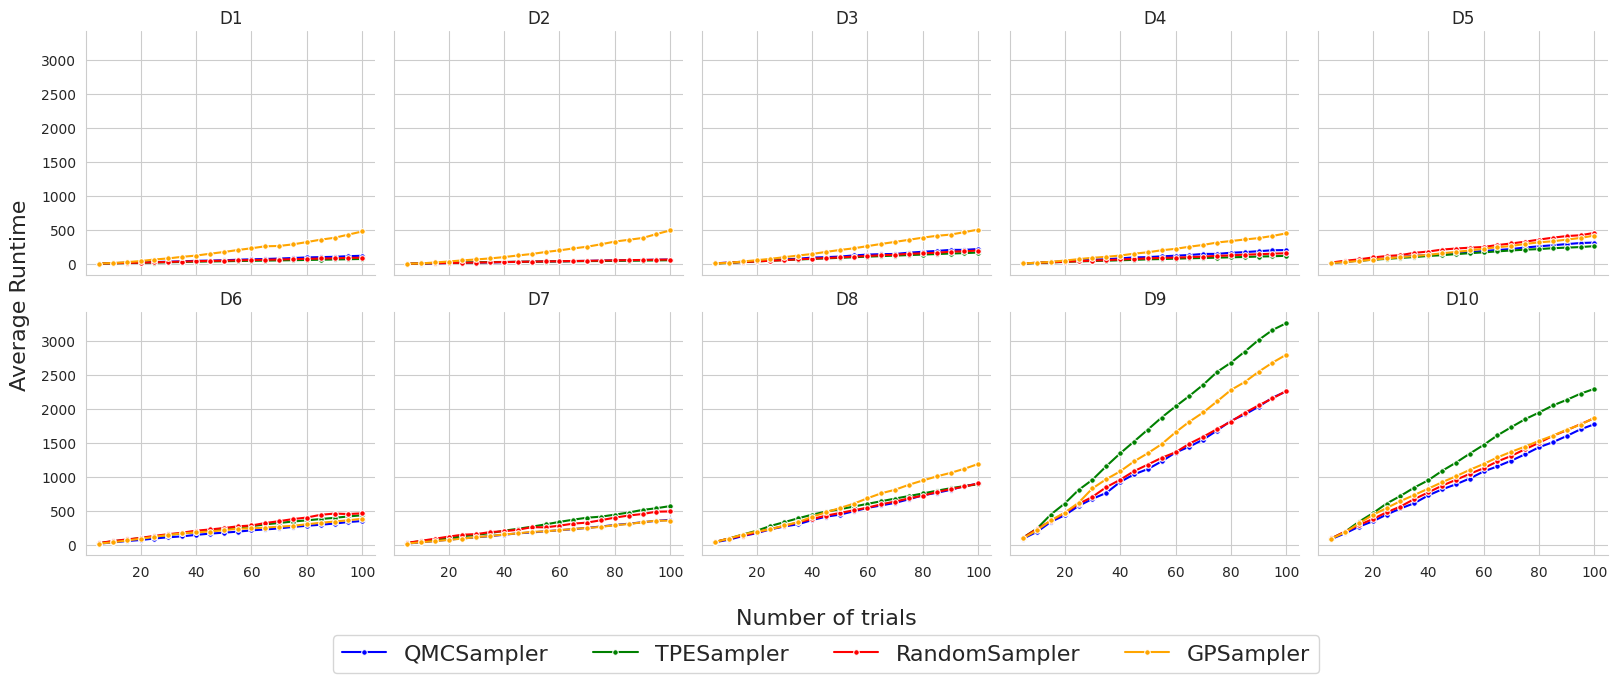

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)
axes = axes.flatten()

def plot_convergence(ax, dataset_name, dataset_data):
    for idx, method in enumerate(methods):
        df = dataset_data[method]
        sum_runtime_per_trial = df.groupby(['max_trials', 'seed'])['runtime'].sum().reset_index()
        avg_runtime_per_max_trials = sum_runtime_per_trial.groupby('max_trials')['runtime'].mean().reset_index()
        avg_runtime_per_max_trials.columns = ['max_trials', 'avg_runtime']
        sns.lineplot(ax=ax, x='max_trials', y='avg_runtime', marker='o', markersize=4, data=avg_runtime_per_max_trials, label=method, color=palette[method], legend=None)
    ax.set_title(f'{dataset_name}', fontsize=12)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for i in range(1, 11):
    dataset_name = f'D{i}'
    ax = axes[i-1]
    plot_convergence(ax, dataset_name, data[dataset_name])
    ax.set_xlabel('')
    ax.set_ylabel('')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=16, bbox_to_anchor=(0.5, -0.15))
fig.text(0.5, -0.05, 'Number of trials', ha='center', fontsize=16)
fig.text(-0.01, 0.5, 'Average Runtime', va='center', rotation='vertical', fontsize=16)
plt.tight_layout()
plt.savefig('./figures/runtime_convergence_plots.png', bbox_inches='tight')
plt.show()

### AUC diagrams

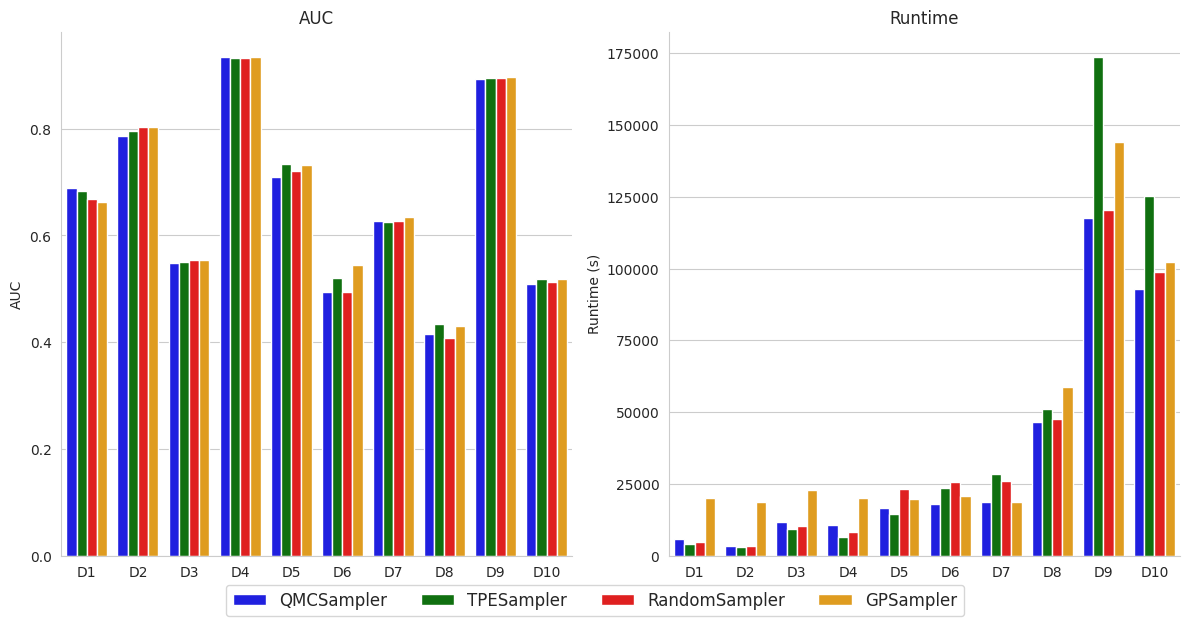

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

df = auc_df
methods = df['sampler'].unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Using a more distinguishable color palette
# palette = sns.color_palette("tab10", n_colors=len(methods))

sns.barplot(ax=axes[0], x='dataset', y='auc', hue='sampler', data=df, palette=palette)
axes[0].set_title('AUC', fontsize=12)
axes[0].set_ylabel('AUC')
axes[0].get_legend().remove()

sns.barplot(ax=axes[1], x='dataset', y='runtime', hue='sampler', data=df, palette=palette)
axes[1].set_title('Runtime', fontsize=12)
axes[1].set_ylabel('Runtime (s)')
axes[1].get_legend().remove()

# remove upper and right frame borders
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')

# Retrieve handles and labels for legend
handles, labels = axes[0].get_legend_handles_labels()

# Place legend below the axes
fig.legend(handles, labels, loc='lower center', ncol=len(methods), bbox_to_anchor=(0.5, -0.05), fontsize=12)

plt.tight_layout()

# Ensure the legend is included in the saved figure
# plt.savefig('./figures/auc.png', bbox_inches='tight')
plt.show()

## Best results per approach

In [35]:
best_f1_conf_df = pd.DataFrame()

datasets = [f'D{i}' for i in range(1, 11)]
samplers = ['QMCSampler', 'TPESampler', 'RandomSampler', 'GPSampler']

for dataset in datasets:
    for sampler in samplers:
        if dataset in data and sampler in data[dataset]:
            df = data[dataset][sampler]
            
            idx_max_f1 = df['f1'].idxmax()
            
            best_f1_row = df.loc[[idx_max_f1]]
            
            best_f1_row['dataset'] = dataset
            best_f1_row['sampler'] = sampler
            
            best_f1_conf_df = pd.concat([best_f1_conf_df, best_f1_row], ignore_index=True)

best_f1_per_dataset = best_f1_conf_df.loc[best_f1_conf_df.groupby('dataset')['f1'].idxmax()]

best_f1_per_dataset = best_f1_per_dataset.reset_index(drop=True)
best_f1_per_dataset

gridsearch_trials = all_trials[all_trials['sampler'] == 'gridsearch']

best_gridsearch_scores = gridsearch_trials.groupby('dataset')['f1'].max().reset_index()

best_gridsearch_scores.rename(columns={'f1': 'Best Gridsearch Score'}, inplace=True)

best_f1_per_dataset = pd.merge(best_f1_per_dataset, best_gridsearch_scores, on='dataset', how='left')

best_f1_per_dataset[['trial', 'dataset', 'sampler', 'max_trials', 'f1', 'Best Gridsearch Score', 'clustering', 'lm', 'k', 'threshold']]
# best_f1_per_dataset

,trial,dataset,sampler,max_trials,f1,Best Gridsearch Score,clustering,lm,k,threshold
0,55,D1,TPESampler,60,78.4314,75.5319,ConnectedComponentsClustering,st5,73,0.874280
1,27,D10,TPESampler,30,56.1133,56.1170,KiralyMSMApproximateClustering,st5,2,0.269090
2,99,D2,TPESampler,100,85.8486,85.8486,UniqueMappingClustering,st5,10,0.594537
3,22,D3,RandomSampler,25,58.9691,59.1887,UniqueMappingClustering,sminilm,10,0.429178
4,70,D4,GPSampler,75,98.5566,98.6011,UniqueMappingClustering,st5,1,0.759879
5,74,D5,GPSampler,75,78.9235,78.7255,ConnectedComponentsClustering,st5,1,0.765179
6,56,D6,GPSampler,60,60.4225,60.2534,UniqueMappingClustering,sminilm,1,0.555229
7,78,D7,GPSampler,80,67.7600,67.3557,ConnectedComponentsClustering,sminilm,84,0.811881
8,66,D8,TPESampler,70,49.5337,47.5550,KiralyMSMApproximateClustering,st5,75,0.920773
9,20,D9,TPESampler,25,94.9241,94.8861,KiralyMSMApproximateClustering,st5,65,0.830563


In [36]:
gridsearch_trials = all_trials[all_trials['sampler'] == 'gridsearch']

idx_best_gridsearch_scores = gridsearch_trials.groupby('dataset')['f1'].idxmax()

best_gridsearch_scores = gridsearch_trials.loc[idx_best_gridsearch_scores].reset_index(drop=True)
best_gridsearch_latex = best_gridsearch_scores[['trial', 'dataset', 'clustering', 'lm', 'k', 'threshold',  'f1']]
best_gridsearch_latex

,trial,dataset,clustering,lm,k,threshold,f1
0,20435,D1,ConnectedComponentsClustering,smpnet,3,0.90,75.5319
1,30130,D10,KiralyMSMApproximateClustering,st5,2,0.65,56.1170
2,14785,D2,UniqueMappingClustering,st5,10,0.35,85.8486
3,7064,D3,UniqueMappingClustering,sminilm,7,0.45,59.1887
4,6282,D4,UniqueMappingClustering,st5,1,0.80,98.6011
5,13276,D5,KiralyMSMApproximateClustering,st5,6,0.75,78.7255
6,4292,D6,UniqueMappingClustering,sminilm,1,0.55,60.2534
7,432,D7,ConnectedComponentsClustering,sminilm,93,0.80,67.3557
8,13979,D8,KiralyMSMApproximateClustering,st5,4,0.90,47.5550
9,5,D9,KiralyMSMApproximateClustering,st5,42,0.80,94.8861


In [37]:
best_gridsearch_latex = best_gridsearch_latex[['dataset', 'lm', 'k', 'clustering', 'threshold',  'f1']]
best_gridsearch_latex['f1'] = best_gridsearch_latex['f1'].round(2)
best_gridsearch_latex_print = best_gridsearch_latex.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(best_gridsearch_latex_print)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
dataset & lm & k & clustering & threshold & f1 \\
\midrule
D1 & smpnet & 3 & ConnectedComponentsClustering & 0.900000 & 75.530000 \\
D10 & st5 & 2 & KiralyMSMApproximateClustering & 0.650000 & 56.120000 \\
D2 & st5 & 10 & UniqueMappingClustering & 0.350000 & 85.850000 \\
D3 & sminilm & 7 & UniqueMappingClustering & 0.450000 & 59.190000 \\
D4 & st5 & 1 & UniqueMappingClustering & 0.800000 & 98.600000 \\
D5 & st5 & 6 & KiralyMSMApproximateClustering & 0.750000 & 78.730000 \\
D6 & sminilm & 1 & UniqueMappingClustering & 0.550000 & 60.250000 \\
D7 & sminilm & 93 & ConnectedComponentsClustering & 0.800000 & 67.360000 \\
D8 & st5 & 4 & KiralyMSMApproximateClustering & 0.900000 & 47.560000 \\
D9 & st5 & 42 & KiralyMSMApproximateClustering & 0.800000 & 94.890000 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1366611/3726779781.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Default configuration results

In [38]:
DEFAULT_CLUSTERING = "UniqueMappingClustering"
DEFAULT_THRESHOLD = 0.5
DEFAULT_LM = 'st5'
DEFAULT_K = 10

default_performance =  all_trials[(all_trials['sampler'] == 'gridsearch') & (all_trials['clustering'] == DEFAULT_CLUSTERING) & (all_trials['threshold'] == DEFAULT_THRESHOLD) & (all_trials['lm'] == DEFAULT_LM) & (all_trials['k'] == DEFAULT_K)]
default_performance.to_csv('./sheets/default_eteer_performance.csv', index=False)   
default_performance

,trial,dataset,clustering,lm,k,threshold,sampler,seed,precision,recall,f1,runtime
234761,24761,D4,UniqueMappingClustering,st5,10,0.5,gridsearch,42,96.4411,98.6960,97.5556,4.450685
259403,9503,D1,UniqueMappingClustering,st5,10,0.5,gridsearch,42,31.2057,98.8764,47.4394,1.903656
322757,32957,D9,UniqueMappingClustering,st5,10,0.5,gridsearch,42,88.2353,96.1872,92.0398,13.108807
349917,20217,D2,UniqueMappingClustering,st5,10,0.5,gridsearch,42,86.8696,84.8513,85.8486,3.278949
401374,31774,D10,UniqueMappingClustering,st5,10,0.5,gridsearch,42,60.4309,48.2089,53.6324,27.956838
447548,38048,D8,UniqueMappingClustering,st5,10,0.5,gridsearch,42,23.9857,70.6917,35.8182,4.462647
455718,6318,D3,UniqueMappingClustering,st5,10,0.5,gridsearch,42,52.3169,63.4633,57.3535,1.485090
503014,13714,D7,UniqueMappingClustering,st5,10,0.5,gridsearch,42,22.2397,90.1370,35.6768,2.210989
536950,7750,D6,UniqueMappingClustering,st5,10,0.5,gridsearch,42,19.2071,72.7612,30.3916,1.812118
591259,22159,D5,UniqueMappingClustering,st5,10,0.5,gridsearch,42,42.2968,90.9553,57.7419,5.054655


# **Problem 2:** Missing ground-truth file

## Joining specs with trials

In [39]:
dataset = 'gridsearch'

trials = pd.read_csv('./data/trials.csv', sep=',')

if dataset == 'gridsearch':
    trials = trials[trials['sampler']=='gridsearch']
elif dataset == 'all':
    pass
else:
    trials = trials[trials['sampler']!='gridsearch']

# trials = trials[trials['f1']!=0]

# Round column in 4 decimals
# trials['f1'] = trials['f1'].round(4)
trials['threshold'] = trials['threshold'].round(6)

dataset_specs = pd.read_csv('./data/dataset_specs.csv', sep=',')
datasets = dataset_specs['dataset'].unique()
trials = pd.merge(trials, dataset_specs, on='dataset')

trials.drop_duplicates(inplace=True)

features = ['clustering', 'lm', 'k', 'threshold', 'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues', 
            'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity', 
            'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute', 'NumberOfMissingNVpairs', 
            'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity']
trials = trials[features + ['f1', 'dataset']]
trials_sample = trials.sample(5)
# trials_sample.to_excel('trials_sample.xlsx', index=False)

In [40]:
print(trials.sample(10))

                            clustering              lm   k  threshold  \
132632  KiralyMSMApproximateClustering          smpnet  56       0.75   
196111   ConnectedComponentsClustering  sdistilroberta  91       0.50   
190364         UniqueMappingClustering             st5  22       0.80   
330758   ConnectedComponentsClustering      sent_glove  81       0.55   
384892   ConnectedComponentsClustering        fasttext  73       0.10   
193226   ConnectedComponentsClustering        word2vec  42       0.25   
218737  KiralyMSMApproximateClustering  sdistilroberta  66       0.90   
392911         UniqueMappingClustering             st5  74       0.60   
1038    KiralyMSMApproximateClustering  sdistilroberta  13       0.30   
128185   ConnectedComponentsClustering         sminilm  30       0.05   

        InputEntityProfiles  NumberOfAttributes  NumberOfDistinctValues  \
132632                 2152                   3                    4383   
196111                50797                  1

## Boxplots & Distribution plots


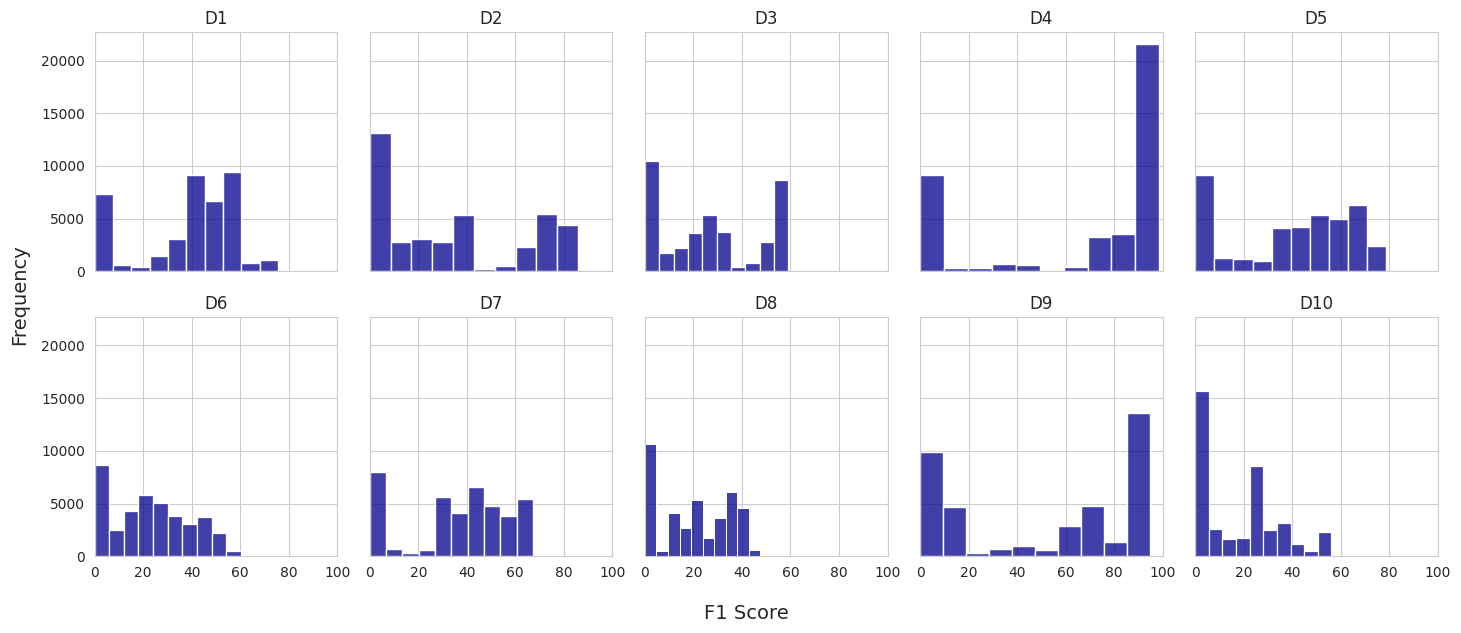

In [41]:
raw_trials = trials[['dataset', 'clustering', 'lm', 'k', 'threshold', 'f1']].copy()

raw_trials['threshold'] = raw_trials['threshold'].round(6)
raw_trials['k'] = raw_trials['k'].astype(int)

unique_raw_trials = raw_trials.drop_duplicates(subset=['dataset','clustering', 'lm', 'k', 'threshold'])

fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)

axes = axes.flatten()

interesting_datasets = unique_raw_trials['dataset'].unique()
interesting_datasets = sorted(interesting_datasets, key=lambda x: int(x[1:]))

for i, dataset in enumerate(interesting_datasets):
    ax = axes[i]
    sns.histplot(data=unique_raw_trials[unique_raw_trials['dataset'] == dataset], x='f1', ax=ax, bins=10, color='darkblue')
    ax.set_title(f'{dataset}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.set_xlim(0, 100)

    # default_f1 = default_performance.loc[default_performance['dataset'] == dataset, 'f1']
    # if not default_f1.empty:
    #     ax.axvline(x=default_f1.values[0], color='red', linestyle='--', label='Default F1 Score')

fig.text(0.45, -0.04, 'F1 Score', ha='center', fontsize=14)
fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)

# import matplotlib.lines as mlines
# default_line = mlines.Line2D([], [], color='red', linestyle='--', label='Default F1 Score')
# fig.legend(handles=[default_line], loc='lower right', fontsize=12, bbox_to_anchor=(0.9, -0.1))

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig(FIGURES_DIR + 'f1_score_distribution.png', bbox_inches='tight')
plt.show()


In [42]:
f1_stats = all_trials.groupby('dataset')['f1'].agg(['min', 'max']).reset_index()
f1_stats.to_csv(TABLES_DIR + 'f1_min_max.csv', index=False)
f1_stats

,dataset,min,max
0,D1,0.0,78.4314
1,D10,0.0,56.1170
2,D2,0.0,85.8486
3,D3,0.0,59.1887
4,D4,0.0,98.6011
5,D5,0.0,78.9235
6,D6,0.0,60.4225
7,D7,0.0,67.7600
8,D8,0.0,49.5337
9,D9,0.0,94.9241


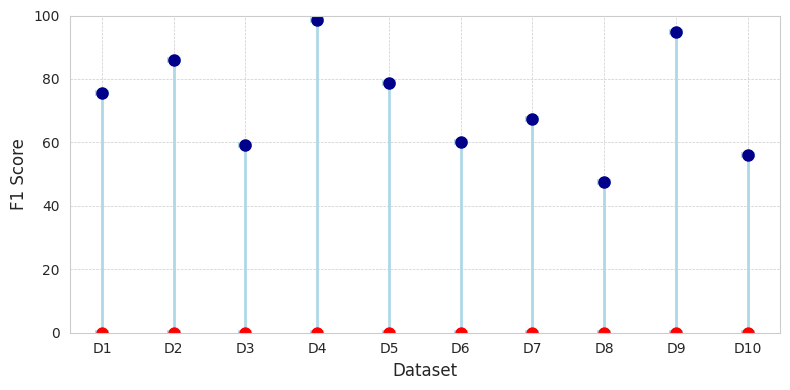

In [43]:
dataset_stats = unique_raw_trials.groupby('dataset')['f1'].agg(['min', 'max']).reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

dataset_stats['dataset'] = pd.Categorical(dataset_stats['dataset'], categories=interesting_datasets, ordered=True)
dataset_stats = dataset_stats.sort_values('dataset')

ax.scatter(dataset_stats['dataset'], dataset_stats['min'], color='red', marker='.', s=250, label='Min F1 Score', zorder=2)

ax.errorbar(dataset_stats['dataset'], 
            dataset_stats['max'], 
            yerr=[dataset_stats['max'] - dataset_stats['min'], 
                  [0]*len(dataset_stats)], 
                  fmt='o', color='darkblue', ecolor='lightblue', 
                 markersize=8,
                  elinewidth=2, 
                  capsize=5, 
                  capthick=4, zorder=1)

# Add red markers for min

# Set labels and limits
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)
ax.set_ylim(0, 100)
# ax.set_title('Min and Max F1 Scores for Each Dataset', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)



# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.savefig(FIGURES_DIR + 'f1_score_min_max_summary.png', bbox_inches='tight')
plt.show()

## Best results per approach

In [44]:
import pandas as pd
import warnings

palette = sns.color_palette("viridis", n_colors=3)
warnings.filterwarnings("ignore", category=FutureWarning)

file_path = './without_gt/autoconf_final_results.csv'
autoconf_final_results = pd.read_csv(file_path)
def categorize_regressor(regressor):
    if 'AutoML' in regressor:
        return 'AutoML'
    elif regressor in ['NN', 'XGBRegressor', 'Ridge', 'LinearRegression', 'RandomForestRegressor', 'SVR', 'Lasso']:
        return 'DL-SKLEARN'
    else:
        return 'Other'

autoconf_final_results['EXPERIMENT'] = autoconf_final_results['REGRESSOR'].apply(categorize_regressor)
dataset_index = autoconf_final_results.columns.get_loc('DATASET') + 1
autoconf_final_results = autoconf_final_results.reindex(columns=autoconf_final_results.columns.tolist()[:dataset_index] + ['EXPERIMENT'] + autoconf_final_results.columns.tolist()[dataset_index:-1])

autoconf_final_results

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME
0,D1,all,AutoML,AutoML Ensemble {random_forest random_forest...,NaN,422.3973,55.6962,78.4314,0.7101,43567.2933,NaN,110.9639
1,D10,all,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,837.8239,28.6228,56.1170,0.5101,43547.1138,NaN,157.0576
2,D2,all,AutoML,AutoML Ensemble {random_forest random_forest...,NaN,699.8066,67.8046,85.8486,0.7898,43513.0280,NaN,57.0685
3,D3,all,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,37.8637,55.9823,59.1887,0.9458,43572.1748,NaN,124.3729
4,D4,all,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,2559.2805,97.4463,98.6011,0.9883,43529.2995,NaN,94.7485
...,...,...,...,...,...,...,...,...,...,...,...,...
205,D6,optuna,DL-SKLEARN,RandomForestRegressor,91.9507,376.4498,41.3707,60.4225,0.6847,2198.5986,21.8822,0.2085
206,D7,optuna,DL-SKLEARN,RandomForestRegressor,89.1187,271.3531,62.1979,67.7600,0.9179,2178.7676,38.8226,0.3609
207,D8,optuna,DL-SKLEARN,RandomForestRegressor,101.3946,637.1424,40.7814,49.5337,0.8233,2940.6945,97.8676,0.9151
208,D9,optuna,DL-SKLEARN,RandomForestRegressor,72.2265,1510.7514,94.3686,94.9241,0.9941,2681.6149,75.1076,0.6862


Save to csv

In [45]:
automl_sheet = autoconf_final_results[autoconf_final_results['EXPERIMENT'] == 'AutoML']
dl_sklearn_sheet = autoconf_final_results[autoconf_final_results['EXPERIMENT'] == 'DL-SKLEARN']

automl_sheet.to_csv(TABLES_DIR + 'automl_sheet.csv', index=False)
dl_sklearn_sheet.to_csv(TABLES_DIR + 'dl_sklearn_sheet.csv', index=False)
autoconf_final_results.to_csv(TABLES_DIR + 'problem2_full.csv', index=False)

In [46]:
dataset_colors = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green', 'Best F1': 'gold'}
dataset_order = ['gridsearch', 'optuna', 'all', 'Best F1']

from matplotlib.patches import Patch

palette = {'all': 'green', 'optuna': 'red', 'gridsearch': 'blue'}
hatches = {'all': '///', 'optuna': '', 'gridsearch': 'O'}
hue_order = ['all', 'optuna', 'gridsearch']
legend_order = ['all', 'optuna', 'gridsearch', 'GB-F1']

### AutoML

/tmp/ipykernel_1366611/74965224.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



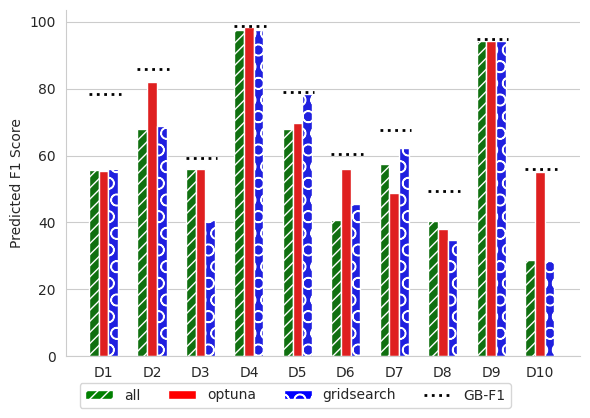

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

data = autoconf_final_results

filtered_data = data[(data['EXPERIMENT'] == 'AutoML') & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], 
                                           categories=test_set_order, ordered=True)

fig, ax = plt.subplots(figsize=(6, 4))
barplot = sns.barplot(ax=ax, data=filtered_data, x='TEST_SET', y='PREDICTED_F1', hue='DATASET',
                      hue_order=hue_order, width=0.6, order=test_set_order, palette=palette, dodge=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

max_values = filtered_data.groupby('TEST_SET')['GLOBAL_BEST_F1'].max()

for j, test_set in enumerate(test_set_order):
    max_value = max_values[test_set]
    line_position = j - 0.3
    ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.65, 
              colors='black', linestyles=':', lw=2)

for bars, dataset in zip(barplot.containers, hue_order):
    hatch = hatches[dataset]
    for bar in bars:
        bar.set_hatch(hatch)

ax.get_legend().remove()

ax.set_ylabel('Predicted F1 Score')
ax.set_xlabel('')

custom_handles = [
    Patch(facecolor=palette[label], edgecolor='white', hatch=hatches[label]) 
    for label in legend_order[:-1]
]

dashed_line = Line2D([0], [0], color='black', linestyle=':', lw=2)
custom_handles.append(dashed_line)

fig.legend(custom_handles, legend_order, loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=10)

plt.tight_layout()
plt.savefig('./figures/autosklearn_f1.png', bbox_inches='tight')
plt.show()


Best reults for each dataset using AutoSKLEARN approach.

In [48]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]
max_f1_rows

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME
20,D1,gridsearch,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,395.9410,55.8730,78.4314,0.7124,43257.0783,NaN,18.6876
12,D2,optuna,AutoML,AutoML Ensemble {extra_trees extra_trees r...,NaN,431.0375,81.9401,85.8486,0.9545,43213.3781,NaN,54.1724
13,D3,optuna,AutoML,AutoML Ensemble {extra_trees extra_trees g...,NaN,293.1290,56.0706,59.1887,0.9473,43204.4283,NaN,26.4913
14,D4,optuna,AutoML,AutoML Ensemble {extra_trees extra_trees r...,NaN,2376.9221,98.3769,98.6011,0.9977,43207.0722,NaN,37.1743
25,D5,gridsearch,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,331.6355,78.5464,78.9235,0.9952,43300.8396,NaN,137.6650
16,D6,optuna,AutoML,AutoML Ensemble {extra_trees extra_trees g...,NaN,365.8910,55.9806,60.4225,0.9265,43212.5421,NaN,93.2320
27,D7,gridsearch,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,315.3770,62.3109,67.7600,0.9196,43290.3449,NaN,150.7719
8,D8,all,AutoML,AutoML Ensemble {random_forest random_forest...,NaN,528.7882,40.4487,49.5337,0.8166,43348.7592,NaN,32.8421
9,D9,all,AutoML,AutoML Ensemble {random_forest random_forest...,NaN,1687.3025,94.3686,94.9241,0.9941,43536.1394,NaN,83.7736
11,D10,optuna,AutoML,AutoML Ensemble {extra_trees extra_trees g...,NaN,269.1317,55.0078,56.1170,0.9802,43207.7945,NaN,69.3814


In [49]:
best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1', 'GLOBAL_BEST_F1', 'PERFORMANCE']

for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & gridsearch &  Ensemble {gradient boosting   gradient boosting   random forest   gradient boosting} & 55.87 & 78.43 & 0.71 \\
D2 & optuna &  Ensemble {extra trees   extra trees   random forest   gradient boosting   gradient boosting} & 81.94 & 85.85 & 0.95 \\
D3 & optuna &  Ensemble {extra trees   extra trees   gradient boosting   random forest} & 56.07 & 59.19 & 0.95 \\
D4 & optuna &  Ensemble {extra trees   extra trees   random forest   gradient boosting} & 98.38 & 98.60 & 1.00 \\
D5 & gridsearch &  Ensemble {gradient boosting   gradient boosting   gradient boosting   random forest   extra trees} & 78.55 & 78.92 & 1.00 \\
D6 & optuna &  Ensemble {extra trees   extra trees   gradient boosting   random forest   gradient boosting} & 55.98 & 60.42 & 0.93 \\
D7 & gridsearch &  Ensemble {gradient boosting   gradient boosting   gradient boosting   random fores

/tmp/ipykernel_1366611/2342345992.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1366611/2342345992.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1366611/2342345992.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Plots for Individual Regressors (DL-SKLEARN) approach

I have removed SVR since it has not run for all trials.

/tmp/ipykernel_1366611/593902376.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



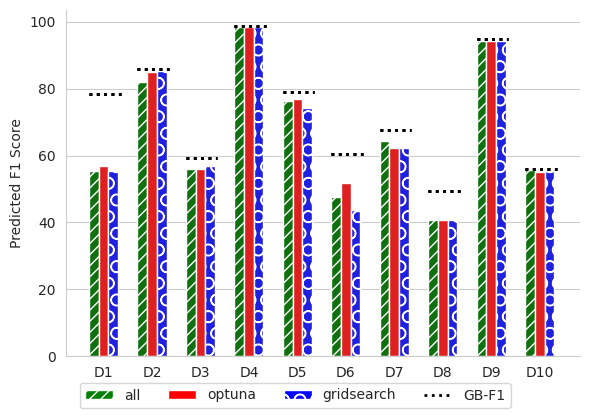

In [50]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = autoconf_final_results

metrics = ['PERFORMANCE', 'PREDICTED_F1', 'OPTIMIZATION_TIME', 'BEST_REGRESSOR_FIT_TIME']
filtered_data = data[(data['EXPERIMENT'] == 'DL-SKLEARN') & 
                     (data['REGRESSOR'] != 'SVR') &  
                     (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]

test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], 
                                           categories=test_set_order, ordered=True)

fig, ax = plt.subplots(figsize=(6, 4))
metric = 'PREDICTED_F1'
temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].max().reset_index()


barplot = sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                      hue_order=hue_order, width=0.6, order=test_set_order, palette=palette)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

if metric == 'PREDICTED_F1':
    max_values = filtered_data.groupby(['TEST_SET', 'DATASET'])['GLOBAL_BEST_F1'].max()
    
    for j, test_set in enumerate(test_set_order):
        max_value = max_values[test_set]
        line_position = j - 0.3
        ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.65, 
                  colors='black', linestyles=':', lw=2)

for bars, dataset in zip(barplot.containers, hue_order):
    hatch = hatches[dataset]
    for bar in bars:
        bar.set_hatch(hatch)

ax.set_ylabel('Predicted F1 Score')

ax.get_legend().remove()

legend_handles = [
    Patch(facecolor=palette[label], edgecolor='white', hatch=hatches[label]) 
    for label in legend_order[:-1]
]

dashed_line = Line2D([0], [0], color='black', linestyle=':', lw=2)
legend_handles.append(dashed_line)

fig.legend(legend_handles, legend_order, loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=10)

plt.tight_layout()
plt.savefig('./figures/sklearn_and_nn_f1.png', bbox_inches='tight')
plt.show()


Best reults for each dataset using SKLEARN & NN approach.

In [51]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]
max_f1_rows

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME
200,D1,optuna,DL-SKLEARN,RandomForestRegressor,88.7365,4.078840e+02,56.7742,78.4314,0.7239,1851.4139,31.6342,0.2879
51,D2,gridsearch,DL-SKLEARN,NN,2.1998,6.268705e+02,85.3976,85.8486,0.9947,16884.4195,453.7113,0.5213
92,D3,gridsearch,DL-SKLEARN,XGBRegressor,32.7940,5.189043e+02,56.8776,59.1887,0.9610,111010.1468,2168.8693,0.2585
33,D4,all,DL-SKLEARN,NN,1.9152,3.487887e+03,98.5122,98.6011,0.9991,26667.9239,740.8571,0.6719
204,D5,optuna,DL-SKLEARN,RandomForestRegressor,84.7220,3.691141e+02,76.9588,78.9235,0.9751,2395.7917,91.5009,0.8181
145,D6,optuna,DL-SKLEARN,XGBRegressor,0.0191,3.507249e+02,51.8145,60.4225,0.8575,113868.2086,3554.7282,0.2397
76,D7,all,DL-SKLEARN,RandomForestRegressor,112.1949,2.717571e+02,64.2428,67.7600,0.9481,5075.9145,31.8871,0.2999
77,D8,all,DL-SKLEARN,RandomForestRegressor,127.3059,6.740332e+02,40.7814,49.5337,0.8233,7154.0789,140.8174,1.3669
78,D9,all,DL-SKLEARN,RandomForestRegressor,83.8295,1.642123e+03,94.3686,94.9241,0.9941,5639.3148,38.8682,0.4088
69,D10,all,DL-SKLEARN,LinearRegression,261.5849,2.047762e+31,55.7954,56.1170,0.9943,1.0469,1.1124,0.0735


In [52]:
best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1', 'GLOBAL_BEST_F1','PERFORMANCE']

# Apply string formatting to keep two decimals
for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:  # Check if the column is of object type, typically used for strings in pandas
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & optuna & RandomForestRegressor & 56.77 & 78.43 & 0.72 \\
D2 & gridsearch & NN & 85.40 & 85.85 & 0.99 \\
D3 & gridsearch & XGBRegressor & 56.88 & 59.19 & 0.96 \\
D4 & all & NN & 98.51 & 98.60 & 1.00 \\
D5 & optuna & RandomForestRegressor & 76.96 & 78.92 & 0.98 \\
D6 & optuna & XGBRegressor & 51.81 & 60.42 & 0.86 \\
D7 & all & RandomForestRegressor & 64.24 & 67.76 & 0.95 \\
D8 & all & RandomForestRegressor & 40.78 & 49.53 & 0.82 \\
D9 & all & RandomForestRegressor & 94.37 & 94.92 & 0.99 \\
D10 & all & LinearRegression & 55.80 & 56.12 & 0.99 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1366611/852235364.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1366611/852235364.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1366611/852235364.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
filtered_data[filtered_data['TEST_SET'] == 'D4'].groupby(by=['DATASET', 'REGRESSOR'])['BEST_REGRESSOR_FIT_TIME'].mean()

DATASET     REGRESSOR            
all         Lasso                    2532.4246
            LinearRegression            1.2062
            NN                        740.8571
            RandomForestRegressor     221.2447
            Ridge                       0.1897
            XGBRegressor             1905.3577
gridsearch  Lasso                    2604.2925
            LinearRegression            1.0719
            NN                        360.2575
            RandomForestRegressor      97.9924
            Ridge                       0.1254
            XGBRegressor             1095.3090
optuna      Lasso                    1572.3802
            LinearRegression            0.3937
            NN                        269.9639
            RandomForestRegressor      45.9955
            Ridge                       0.0643
            XGBRegressor             1807.3036
Name: BEST_REGRESSOR_FIT_TIME, dtype: float64

In [54]:
filtered_data.groupby(by=['TEST_SET', 'REGRESSOR'])['PREDICTED_F1'].max()

TEST_SET  REGRESSOR            
D1        Lasso                    55.3459
          LinearRegression         55.3459
          NN                       55.3459
          RandomForestRegressor    56.7742
          Ridge                    55.3459
          XGBRegressor             54.6584
D2        Lasso                    81.9401
          LinearRegression         81.9401
          NN                       85.3976
          RandomForestRegressor    78.4566
          Ridge                    81.9401
          XGBRegressor             84.9483
D3        Lasso                    55.9823
          LinearRegression         55.9823
          NN                       53.8688
          RandomForestRegressor    56.8619
          Ridge                    55.9823
          XGBRegressor             56.8776
D4        Lasso                    98.3769
          LinearRegression         98.3769
          NN                       98.5122
          RandomForestRegressor    98.3769
          Ridge       

### **Concatenated** comparison

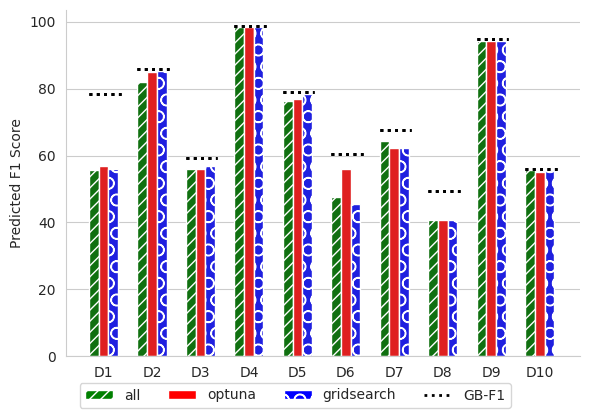

In [55]:
data = autoconf_final_results

filtered_data = data[(data['REGRESSOR'] != 'SVR') & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], 
                                           categories=test_set_order, ordered=True)

fig, ax = plt.subplots(figsize=(6, 4))

metric = 'PREDICTED_F1'
temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].max().reset_index()

barplot = sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                      hue_order=hue_order, width=0.6, order=test_set_order, palette=palette)

ax.set_xlabel('')
ax.tick_params(axis='x')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

if metric == 'PREDICTED_F1':
    max_values = filtered_data.groupby(['TEST_SET', 'DATASET'])['GLOBAL_BEST_F1'].max()
    
    for j, test_set in enumerate(test_set_order):
        max_value = max_values[test_set]
        line_position = j - 0.3
        ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.65, 
                  colors='black', linestyles=':', lw=2)

for bars, dataset in zip(barplot.containers, hue_order):
    hatch = hatches[dataset]
    for bar in bars:
        bar.set_hatch(hatch)

ax.set_ylabel('Predicted F1 Score')

ax.get_legend().remove()

custom_handles = [
    Patch(facecolor=palette[label], edgecolor='white', hatch=hatches[label]) 
    for label in legend_order[:-1]
]

dashed_line = Line2D([0], [0], color='black', linestyle=':', lw=2)
custom_handles.append(dashed_line)

fig.legend(custom_handles, legend_order, loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.tight_layout()
plt.savefig('./figures/all_f1.png', bbox_inches='tight')
plt.show()


In [56]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]
max_f1_rows

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME
200,D1,optuna,DL-SKLEARN,RandomForestRegressor,88.7365,4.078840e+02,56.7742,78.4314,0.7239,1851.4139,31.6342,0.2879
51,D2,gridsearch,DL-SKLEARN,NN,2.1998,6.268705e+02,85.3976,85.8486,0.9947,16884.4195,453.7113,0.5213
92,D3,gridsearch,DL-SKLEARN,XGBRegressor,32.7940,5.189043e+02,56.8776,59.1887,0.9610,111010.1468,2168.8693,0.2585
33,D4,all,DL-SKLEARN,NN,1.9152,3.487887e+03,98.5122,98.6011,0.9991,26667.9239,740.8571,0.6719
25,D5,gridsearch,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,3.316355e+02,78.5464,78.9235,0.9952,43300.8396,NaN,137.6650
16,D6,optuna,AutoML,AutoML Ensemble {extra_trees extra_trees g...,NaN,3.658910e+02,55.9806,60.4225,0.9265,43212.5421,NaN,93.2320
76,D7,all,DL-SKLEARN,RandomForestRegressor,112.1949,2.717571e+02,64.2428,67.7600,0.9481,5075.9145,31.8871,0.2999
77,D8,all,DL-SKLEARN,RandomForestRegressor,127.3059,6.740332e+02,40.7814,49.5337,0.8233,7154.0789,140.8174,1.3669
9,D9,all,AutoML,AutoML Ensemble {random_forest random_forest...,NaN,1.687303e+03,94.3686,94.9241,0.9941,43536.1394,NaN,83.7736
69,D10,all,DL-SKLEARN,LinearRegression,261.5849,2.047762e+31,55.7954,56.1170,0.9943,1.0469,1.1124,0.0735


In [57]:
best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']

# Apply string formatting to keep two decimals
for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:  # Check if the column is of object type, typically used for strings in pandas
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & optuna & RandomForestRegressor & 56.77 & 78.43 & 0.72 \\
D2 & gridsearch & NN & 85.40 & 85.85 & 0.99 \\
D3 & gridsearch & XGBRegressor & 56.88 & 59.19 & 0.96 \\
D4 & all & NN & 98.51 & 98.60 & 1.00 \\
D5 & gridsearch &  Ensemble {gradient boosting   gradient boosting   gradient boosting   random forest   extra trees} & 78.55 & 78.92 & 1.00 \\
D6 & optuna &  Ensemble {extra trees   extra trees   gradient boosting   random forest   gradient boosting} & 55.98 & 60.42 & 0.93 \\
D7 & all & RandomForestRegressor & 64.24 & 67.76 & 0.95 \\
D8 & all & RandomForestRegressor & 40.78 & 49.53 & 0.82 \\
D9 & all &  Ensemble {random forest   random forest   gradient boosting   extra trees} & 94.37 & 94.92 & 0.99 \\
D10 & all & LinearRegression & 55.80 & 56.12 & 0.99 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1366611/1203056289.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1366611/1203056289.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1366611/1203056289.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Runtimes

In [58]:
autoconf_final_results

,TEST_SET,DATASET,EXPERIMENT,REGRESSOR,VALIDATION_MSE,TEST_MSE,PREDICTED_F1,GLOBAL_BEST_F1,PERFORMANCE,OPTIMIZATION_TIME,BEST_REGRESSOR_FIT_TIME,BEST_REGRESSOR_PREDICTION_TIME
0,D1,all,AutoML,AutoML Ensemble {random_forest random_forest...,NaN,422.3973,55.6962,78.4314,0.7101,43567.2933,NaN,110.9639
1,D10,all,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,837.8239,28.6228,56.1170,0.5101,43547.1138,NaN,157.0576
2,D2,all,AutoML,AutoML Ensemble {random_forest random_forest...,NaN,699.8066,67.8046,85.8486,0.7898,43513.0280,NaN,57.0685
3,D3,all,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,37.8637,55.9823,59.1887,0.9458,43572.1748,NaN,124.3729
4,D4,all,AutoML,AutoML Ensemble {gradient_boosting gradient_...,NaN,2559.2805,97.4463,98.6011,0.9883,43529.2995,NaN,94.7485
...,...,...,...,...,...,...,...,...,...,...,...,...
205,D6,optuna,DL-SKLEARN,RandomForestRegressor,91.9507,376.4498,41.3707,60.4225,0.6847,2198.5986,21.8822,0.2085
206,D7,optuna,DL-SKLEARN,RandomForestRegressor,89.1187,271.3531,62.1979,67.7600,0.9179,2178.7676,38.8226,0.3609
207,D8,optuna,DL-SKLEARN,RandomForestRegressor,101.3946,637.1424,40.7814,49.5337,0.8233,2940.6945,97.8676,0.9151
208,D9,optuna,DL-SKLEARN,RandomForestRegressor,72.2265,1510.7514,94.3686,94.9241,0.9941,2681.6149,75.1076,0.6862


### AutoML

In [59]:
automl_runtimes_df = autoconf_final_results[(autoconf_final_results['EXPERIMENT'] == 'AutoML') & (autoconf_final_results['DATASET'].isin(['gridsearch', 'optuna', 'all']))]

In [60]:
optimization_time_res = automl_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['OPTIMIZATION_TIME'].mean().reset_index()
prediction_time_res = automl_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['BEST_REGRESSOR_PREDICTION_TIME'].mean().reset_index()
automl_merged_res = pd.merge(optimization_time_res, prediction_time_res, on=['TEST_SET', 'DATASET', 'REGRESSOR'])
automl_merged_res.to_csv(TABLES_DIR+'/automl_runtimes.csv', index=False)
automl_merged_res


,TEST_SET,DATASET,REGRESSOR,OPTIMIZATION_TIME,BEST_REGRESSOR_PREDICTION_TIME
0,D1,all,AutoML Ensemble {random_forest random_forest...,43567.2933,110.9639
1,D1,gridsearch,AutoML Ensemble {gradient_boosting gradient_...,43257.0783,18.6876
2,D1,optuna,AutoML Ensemble {extra_trees extra_trees r...,43205.9562,22.2687
3,D10,all,AutoML Ensemble {gradient_boosting gradient_...,43547.1138,157.0576
4,D10,gridsearch,AutoML Ensemble {gradient_boosting gradient_...,43275.0550,144.7314
5,D10,optuna,AutoML Ensemble {extra_trees extra_trees g...,43207.7945,69.3814
6,D2,all,AutoML Ensemble {random_forest random_forest...,43513.0280,57.0685
7,D2,gridsearch,AutoML Ensemble {gradient_boosting gradient_...,43335.3717,89.7032
8,D2,optuna,AutoML Ensemble {extra_trees extra_trees r...,43213.3781,54.1724
9,D3,all,AutoML Ensemble {gradient_boosting gradient_...,43572.1748,124.3729


### Individual Regressors

In [61]:
ind_regressors_runtimes_df = autoconf_final_results[(autoconf_final_results['EXPERIMENT'] == 'DL-SKLEARN') & (autoconf_final_results['DATASET'].isin(['gridsearch', 'optuna', 'all']))]

In [62]:
optimization_time_res = ind_regressors_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['OPTIMIZATION_TIME'].mean().reset_index()
prediction_time_res = ind_regressors_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['BEST_REGRESSOR_PREDICTION_TIME'].mean().reset_index()
fit_time_res = ind_regressors_runtimes_df.groupby(['TEST_SET', 'DATASET', 'REGRESSOR'])['BEST_REGRESSOR_FIT_TIME'].mean().reset_index()
individual_regressors_merged_res = pd.merge(optimization_time_res, prediction_time_res, on=['TEST_SET', 'DATASET', 'REGRESSOR'])
individual_regressors_merged_res = pd.merge(individual_regressors_merged_res, fit_time_res, on=['TEST_SET', 'DATASET', 'REGRESSOR'])

individual_regressors_merged_res.to_csv(TABLES_DIR+'individual_regressors_runtimes.csv', index=False)
individual_regressors_merged_res

,TEST_SET,DATASET,REGRESSOR,OPTIMIZATION_TIME,BEST_REGRESSOR_PREDICTION_TIME,BEST_REGRESSOR_FIT_TIME
0,D1,all,Lasso,70834.7107,0.0275,1570.2286
1,D1,all,LinearRegression,1.4747,0.0582,1.7105
2,D1,all,NN,27715.3622,0.7789,754.6006
3,D1,all,RandomForestRegressor,4551.7262,0.8489,77.5193
4,D1,all,Ridge,11.6841,0.0331,0.0610
...,...,...,...,...,...,...
175,D9,optuna,LinearRegression,1.2374,0.0013,0.8307
176,D9,optuna,NN,9531.8622,0.3036,234.9329
177,D9,optuna,RandomForestRegressor,2681.6149,0.6862,75.1076
178,D9,optuna,Ridge,7.1916,0.0011,0.1464


## Feature importance

In [63]:
automl_features_importance_path = './without_gt/automl/automl_feature_importance.csv'
sklearn_features_importance_path = './without_gt/sklearn/sklearn_feature_importance.csv'

In [64]:
automl_features_df = pd.read_csv(automl_features_importance_path)
sklearn_features_df = pd.read_csv(sklearn_features_importance_path)

# Display the first few rows of each DataFrame to understand the structure
print(automl_features_df.head())
print(sklearn_features_df.head())

                  FEATURE  IMPORTANCE       STD  RANK DATASET TEST_SET  \
0                       k    0.001880  0.000048     0  optuna      D10   
1               threshold    0.006992  0.000088     1  optuna      D10   
2     InputEntityProfiles    0.000000  0.000000     2  optuna      D10   
3      NumberOfAttributes    0.000000  0.000000     3  optuna      D10   
4  NumberOfDistinctValues    0.000000  0.000000     4  optuna      D10   

  REGRESSOR  
0    AutoML  
1    AutoML  
2    AutoML  
3    AutoML  
4    AutoML  
                  FEATURE  IMPORTANCE DATASET REGRESSOR TEST_SET
0                       k    0.000069     all     RIDGE       D7
1               threshold   -0.160133     all     RIDGE       D7
2     InputEntityProfiles    0.000000     all     RIDGE       D7
3      NumberOfAttributes    0.000000     all     RIDGE       D7
4  NumberOfDistinctValues    0.000000     all     RIDGE       D7


In [65]:
# automl_features_df[automl_features_df['FEATURE'] == 'AverageValueTokens']['IMPORTANCE'] > 0

In [66]:
dataset_features = ['MaxValuesPerEntity',
       'InputEntityProfiles', 'NumberOfAttributes',
       'AverageDistinctValuesPerEntity', 'NumberOfDistinctValues',
       'AverageNVPairsPerEntity', 'NumberOfNameValuePairs',
       'AverageValueLength', 'NumberOfMissingNVpairs',
       'AverageDistinctValuesPerAttribute', 'AverageNVpairsPerAttribute',
       'AverageValueTokens']

In [67]:
automl_features_df[automl_features_df['FEATURE'].isin(dataset_features) & (automl_features_df['IMPORTANCE'] != 0)]

,FEATURE,IMPORTANCE,STD,RANK,DATASET,TEST_SET,REGRESSOR


In [68]:
sklearn_features_df[sklearn_features_df['FEATURE'].isin(dataset_features) & (sklearn_features_df['IMPORTANCE'] != 0)]

,FEATURE,IMPORTANCE,DATASET,REGRESSOR,TEST_SET


In [69]:
top_features_automl = automl_features_df.groupby('FEATURE')['IMPORTANCE'].mean().reset_index()
top_features_automl['IMPORTANCE'] = top_features_automl['IMPORTANCE'].abs()
top_features_automl = top_features_automl.sort_values(by='IMPORTANCE', ascending=False)

top_features_sklearn = sklearn_features_df.groupby('FEATURE')['IMPORTANCE'].mean().reset_index()
top_features_sklearn = top_features_sklearn.sort_values(by='IMPORTANCE', ascending=False)

In [70]:
print("Top features according to AutoML:")
print(top_features_automl)

Top features according to AutoML:
                                      FEATURE  IMPORTANCE
12   clustering_ConnectedComponentsClustering    0.245410
23                                  threshold    0.024191
21                                     lm_st5    0.022079
14         clustering_UniqueMappingClustering    0.005797
16                                lm_fasttext    0.004496
20                                  lm_smpnet    0.002657
13  clustering_KiralyMSMApproximateClustering    0.002605
19                                 lm_sminilm    0.002468
18                              lm_sent_glove    0.001336
15                                          k    0.000476
22                                lm_word2vec    0.000430
17                          lm_sdistilroberta    0.000344
3                  AverageNVpairsPerAttribute    0.000000
2                     AverageNVPairsPerEntity    0.000000
1              AverageDistinctValuesPerEntity    0.000000
11                     NumberOfNameVal

In [71]:
top_features_sklearn['FEATURE'] = top_features_sklearn['FEATURE'].replace(
    to_replace=r'^lm_.*', value='lm', regex=True)
top_features_sklearn['FEATURE'] = top_features_sklearn['FEATURE'].replace(
    to_replace=r'^clustering_.*', value='clustering', regex=True)
merged_top_features_sklearn = top_features_sklearn.groupby('FEATURE', as_index=False).sum()

merged_top_features_sklearn = merged_top_features_sklearn.sort_values(by='IMPORTANCE', ascending=False)
merged_top_features_sklearn

,FEATURE,IMPORTANCE
14,lm,5.101729e+11
12,clustering,1.817857e+11
15,threshold,9.382492e+10
13,k,7.036868e+10
0,AverageDistinctValuesPerAttribute,0.000000e+00
1,AverageDistinctValuesPerEntity,0.000000e+00
2,AverageNVPairsPerEntity,0.000000e+00
3,AverageNVpairsPerAttribute,0.000000e+00
4,AverageValueLength,0.000000e+00
5,AverageValueTokens,0.000000e+00


In [72]:
top_features_automl['FEATURE'] = top_features_automl['FEATURE'].replace(
    to_replace=r'^lm_.*', value='lm', regex=True)
top_features_automl['FEATURE'] = top_features_automl['FEATURE'].replace(
    to_replace=r'^clustering_.*', value='clustering', regex=True)
merged_top_features_automl = top_features_automl.groupby('FEATURE', as_index=False).sum()

merged_top_features_automl = merged_top_features_automl.sort_values(by='IMPORTANCE', ascending=False)
merged_top_features_automl

,FEATURE,IMPORTANCE
12,clustering,0.253811
14,lm,0.033810
15,threshold,0.024191
13,k,0.000476
0,AverageDistinctValuesPerAttribute,0.000000
1,AverageDistinctValuesPerEntity,0.000000
2,AverageNVPairsPerEntity,0.000000
3,AverageNVpairsPerAttribute,0.000000
4,AverageValueLength,0.000000
5,AverageValueTokens,0.000000


In [73]:
def plot_feature_importance(df, title):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(df['FEATURE'], df['IMPORTANCE'], color='blue',  hatch='....')
    plt.xlabel('Importance')
    # plt.xscale('log')
    # plt.title('Top Features by Importance ('+title+')')
    plt.gca().invert_yaxis()

    for bar, feature in zip(bars, df['FEATURE']):
        plt.text(bar.get_width() + 0.001, 
                    bar.get_y() + bar.get_height()/2, 
                    feature, va='center', ha='left', color='black', fontsize=12)

    plt.gca().get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.savefig(f'./figures/feature_importance_{title}.png', bbox_inches='tight')
    plt.show()

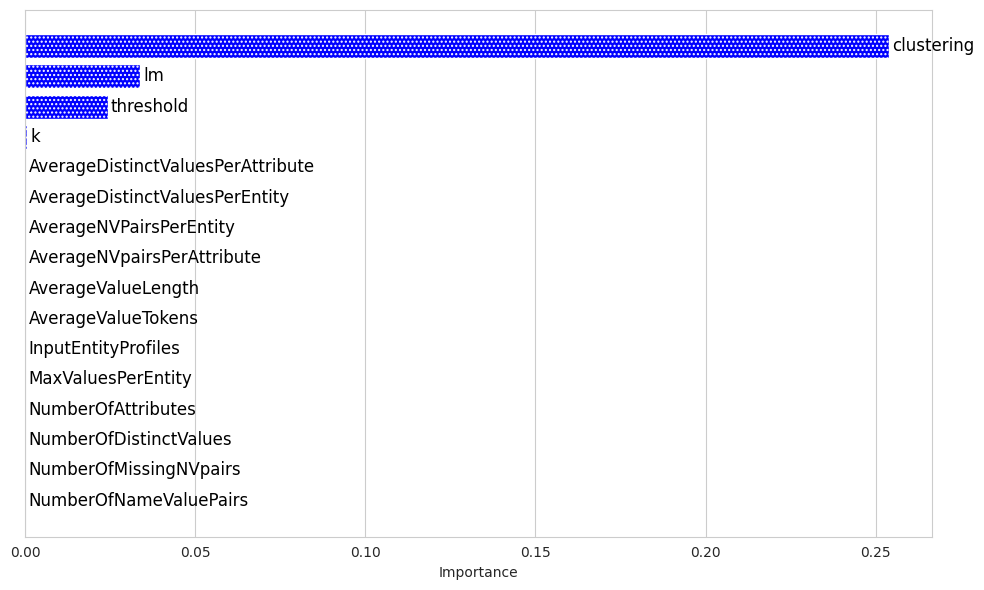

In [74]:
plot_feature_importance(merged_top_features_automl, 'AutoML')

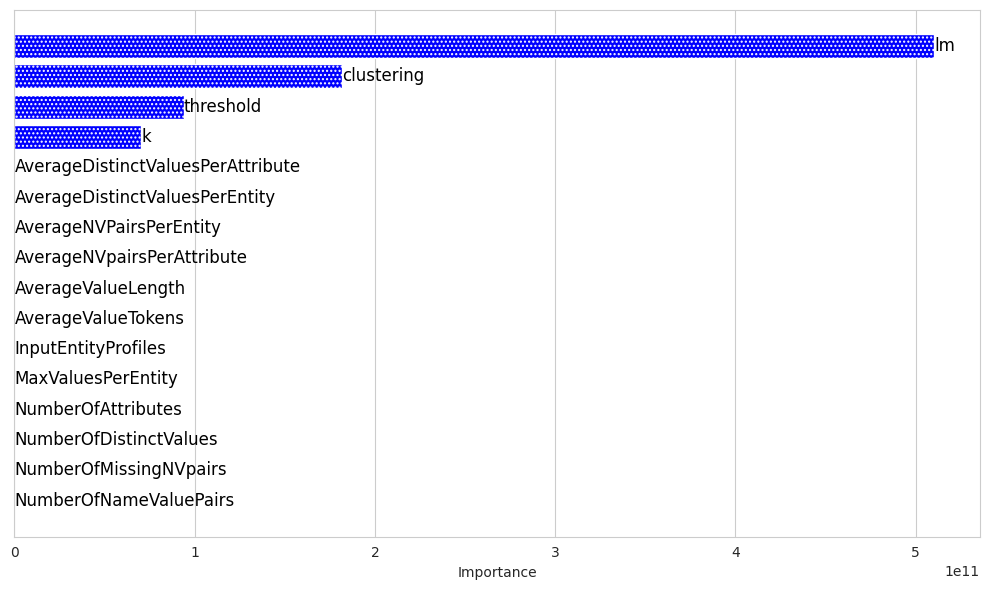

In [75]:
plot_feature_importance(merged_top_features_sklearn, 'DL-SKLEARN')

In [76]:
print("Top features according to sklearn:")
top_features_sklearn

Top features according to sklearn:


,FEATURE,IMPORTANCE
20,lm,1.172810e+11
19,lm,1.055530e+11
12,clustering,9.968883e+10
21,threshold,9.382492e+10
13,clustering,8.209691e+10
17,lm,8.209688e+10
16,lm,7.623267e+10
14,k,7.036868e+10
15,lm,7.036857e+10
18,lm,5.864067e+10


Per dataset

In [77]:
top_features_per_dataset_automl = automl_features_df.groupby(['DATASET', 'FEATURE'])['IMPORTANCE'].mean().reset_index()
top_features_per_dataset_automl = top_features_per_dataset_automl.sort_values(['DATASET', 'IMPORTANCE'], ascending=[True, False])

print("Top features per dataset in AutoML:")
top_features_per_dataset_automl.groupby('DATASET').head(5)

Top features per dataset in AutoML:


,DATASET,FEATURE,IMPORTANCE
12,all,clustering_ConnectedComponentsClustering,0.371825
21,all,lm_st5,0.041041
23,all,threshold,0.028310
13,all,clustering_KiralyMSMApproximateClustering,0.005097
17,all,lm_sdistilroberta,0.000694
36,gridsearch,clustering_ConnectedComponentsClustering,0.267461
47,gridsearch,threshold,0.013170
40,gridsearch,lm_fasttext,0.007510
42,gridsearch,lm_sent_glove,0.007350
45,gridsearch,lm_st5,0.005696


In [78]:
top_features_per_dataset_sklearn = sklearn_features_df.groupby(['DATASET', 'FEATURE'])['IMPORTANCE'].mean().reset_index()
top_features_per_dataset_sklearn = top_features_per_dataset_sklearn.sort_values(['DATASET', 'IMPORTANCE'], ascending=[True, False])

print("Top features per dataset in sklearn:")
top_features_per_dataset_sklearn.groupby('DATASET').head(5)

Top features per dataset in sklearn:


,DATASET,FEATURE,IMPORTANCE
20,all,lm_word2vec,3.518432e+11
19,all,lm_st5,3.166589e+11
12,all,clustering_KiralyMSMApproximateClustering,2.990666e+11
21,all,threshold,2.814748e+11
13,all,clustering_UniqueMappingClustering,2.462908e+11
39,gridsearch,lm_sminilm,2.758413e+05
41,gridsearch,lm_st5,2.749812e+05
40,gridsearch,lm_smpnet,2.388216e+05
37,gridsearch,lm_sdistilroberta,2.031618e+05
38,gridsearch,lm_sent_glove,9.239766e+04


# **Benchmarking:** DBPEDIA data

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

dbpedia_results = './benchmarking/results/real_f1s/'
pattern = r'd1d10_dbpedia_(.*?)\.csv'

dbpedia_dfs = []
for f in os.listdir(dbpedia_results):
    if f.endswith('.csv'):
        df = pd.read_csv(dbpedia_results + f)
        type_d = re.search(pattern, f)
        dbpedia_dfs.append((type_d.group(1),df))
dbpedia_conc_results = pd.concat([x[1] for x in dbpedia_dfs], ignore_index=True)
dbpedia_conc_results['training_instances_type'] = [x[0] for x in dbpedia_dfs]

dbpedia_conc_results

,dataset,lm,k,clustering,threshold,training_time,prediction_time,predicted_f1,real_f1,real_precision,real_recall,pyjedai_runtime,training_instances_type
0,dbpedia,smpnet,85.0,KiralyMSMApproximateClustering,0.55,1.727700e+09,17.2191,71.9465,74.26,78.48,70.47,135167.1113,gridsearch
1,dbpedia,st5,18.0,KiralyMSMApproximateClustering,0.05,1.727700e+09,13.0725,76.1322,84.84,83.59,86.12,170741.4530,all
2,dbpedia,st5,1.0,KiralyMSMApproximateClustering,0.05,1.727700e+09,15.5378,58.4471,84.84,83.31,86.43,170774.0874,optuna


In [80]:
dbpedia_conc_results.to_csv(TABLES_DIR + 'dbpedia_results.csv', index=False)

In [81]:
# latex_output = dbpedia_results_to_latex.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|c|c|', longtable=False)
# print(latex_output)

# **Baseline:** ZeroER

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

zeroer_results = pd.read_csv('./sheets/ZeroER.csv')
print(zeroer_results)
zeroer_results['runtime (s)'] = zeroer_results['runtime (s)'].round(0)

zeroer_results['f1'] = zeroer_results['f1']*100
zeroer_results['f1'] = zeroer_results['f1'].round(2)



zeroer_results.rename(columns={'runtime (s)': 'Runtime (sec)', 'dataset': 'Dataset', 'f1':'F1 (\%)'}, inplace=True)

# keep only 2 decimals 
zeroer_results['F1 (\%)'] = zeroer_results['F1 (\%)'].round(2)

latex_output = zeroer_results.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|c|c|', longtable=False)

print(latex_output)

  dataset   runtime (s)        f1
0      D1      3.828759  0.000000
1      D2   4169.030765  0.464561
2      D4  20022.899320  0.969996
3      D5   2039.209009  0.927911
4      D7   4012.717816  0.880734
5      D9  87846.422920  0.640629
6     D10   1581.930722  0.926165
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\toprule
Dataset & Runtime (sec) & F1 (\%) \\
\midrule
D1 & 4.000000 & 0.000000 \\
D2 & 4169.000000 & 46.460000 \\
D4 & 20023.000000 & 97.000000 \\
D5 & 2039.000000 & 92.790000 \\
D7 & 4013.000000 & 88.070000 \\
D9 & 87846.000000 & 64.060000 \\
D10 & 1582.000000 & 92.620000 \\
\bottomrule
\end{tabular}

